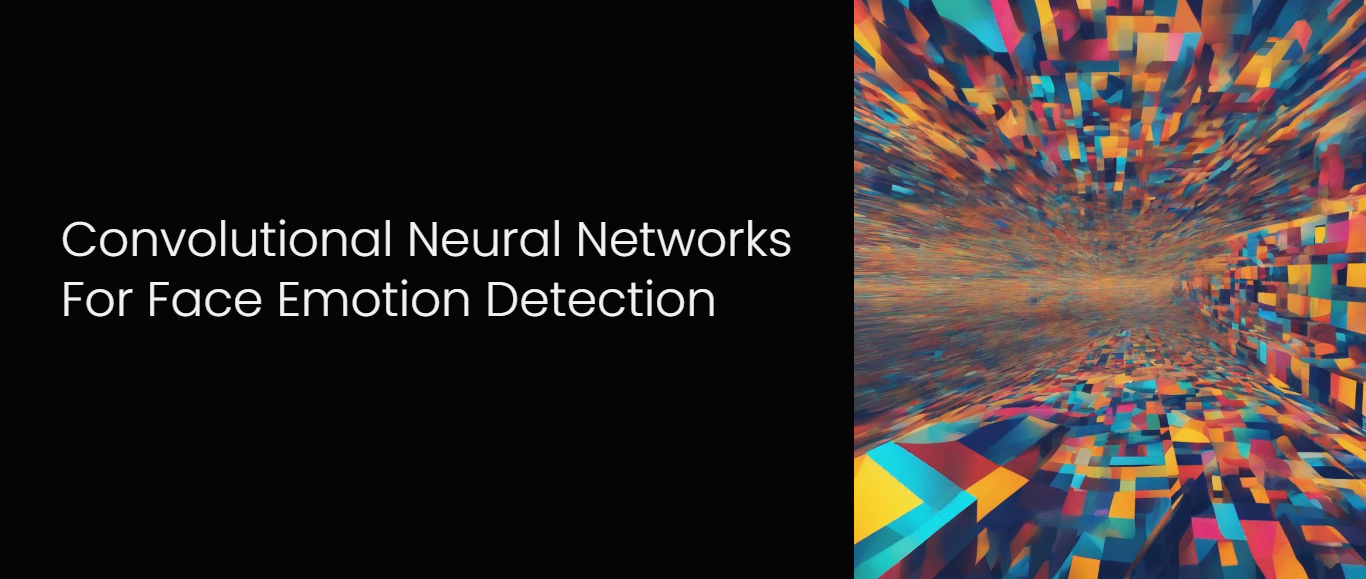

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
import os
from matplotlib import pyplot as plt
import numpy as np

#Dataset: FER-2013

The FER 2013 dataset, short for Facial Expression Recognition 2013 dataset, is a widely used benchmark dataset in the field of computer vision and facial expression analysis. It consists of 35,887 grayscale images of size 48x48 pixels. These images depict facial expressions of individuals belonging to seven different categories: anger, disgust, fear, happiness, sadness, surprise, and neutral.
The FER 2013 dataset has been widely used in academic research and in the development of facial expression recognition algorithms and models. It serves as a standard benchmark for evaluating the performance of different approaches to facial expression recognition, including traditional machine learning methods and deep learning techniques.

In [ ]:
!ls "/content/drive/MyDrive/NITC_Projects/Deep_Learning_Projects/CNN_Face_emotion_detection/datasets/"


 archive.zip  'Copy of archive.zip'   face_emotion_50im_each   small_face_emotion_datasets


In [ ]:
!cp "/content/drive/MyDrive/NITC_Projects/Deep_Learning_Projects/CNN_Face_emotion_detection/datasets/archive.zip" /content


In [ ]:
!unzip -q archive.zip -d /content/

In [ ]:
train_data_dir='/content/train'
validation_data_dir='/content/test'

In [ ]:
import os

train_data_dir = '/content/train'
validation_data_dir = '/content/test'

def count_images_per_class(data_dir):
    class_counts = {}
    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            num_images = len(os.listdir(class_path))
            class_counts[class_name] = num_images
    return class_counts

train_class_counts = count_images_per_class(train_data_dir)


print("Training Data Class-wise Image Counts:")
for class_name, count in train_class_counts.items():
    print(f"{class_name}: {count} images")




Training Data Class-wise Image Counts:
happy: 7215 images
neutral: 4965 images
fear: 4097 images
angry: 3995 images
disgust: 436 images
sad: 4830 images
surprise: 3171 images


In [ ]:
!ls "/content/test"

angry  disgust	fear  happy  neutral  sad  surprise


#Image Preprocessing:


*   image augmentation
*   normalizations of pixel values


In [ ]:



IMG_HEIGHT=48
IMG_WIDTH = 48
batch_size=32
images_to_test = 5000

train_datagen = ImageDataGenerator(
					rescale=1./255,
					rotation_range=30,
					shear_range=0.3,
					zoom_range=0.3,
					horizontal_flip=True,
					fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
					train_data_dir,
					color_mode='grayscale',
					target_size=(IMG_HEIGHT, IMG_WIDTH),
					batch_size=batch_size,
					class_mode='categorical',
					shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
							validation_data_dir,
							color_mode='grayscale',
							target_size=(IMG_HEIGHT, IMG_WIDTH),
							batch_size=batch_size,
							class_mode='categorical',
							shuffle=True)

test_generator = validation_datagen.flow_from_directory(
							validation_data_dir,
							color_mode='grayscale',
							target_size=(IMG_HEIGHT, IMG_WIDTH),
							batch_size = images_to_test ,
							class_mode='categorical',
							shuffle=True)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
class_labels=['angry','disgust', 'fear', 'happy','neutral','sad','surprise']

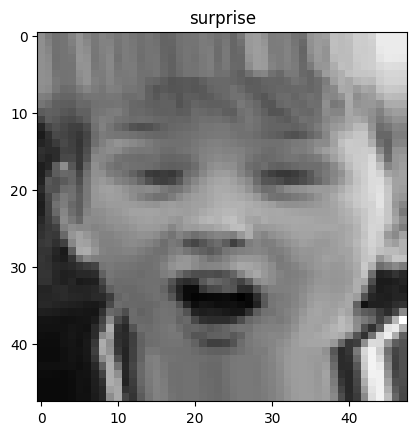

In [ ]:


img, label = train_generator.__next__()

import random

i=random.randint(0, (img.shape[0])-1)
image = img[i]
labl = class_labels[label[i].argmax()]
plt.imshow(image[:,:,0], cmap='gray')
plt.title(labl)
plt.show()


#Sample Training images

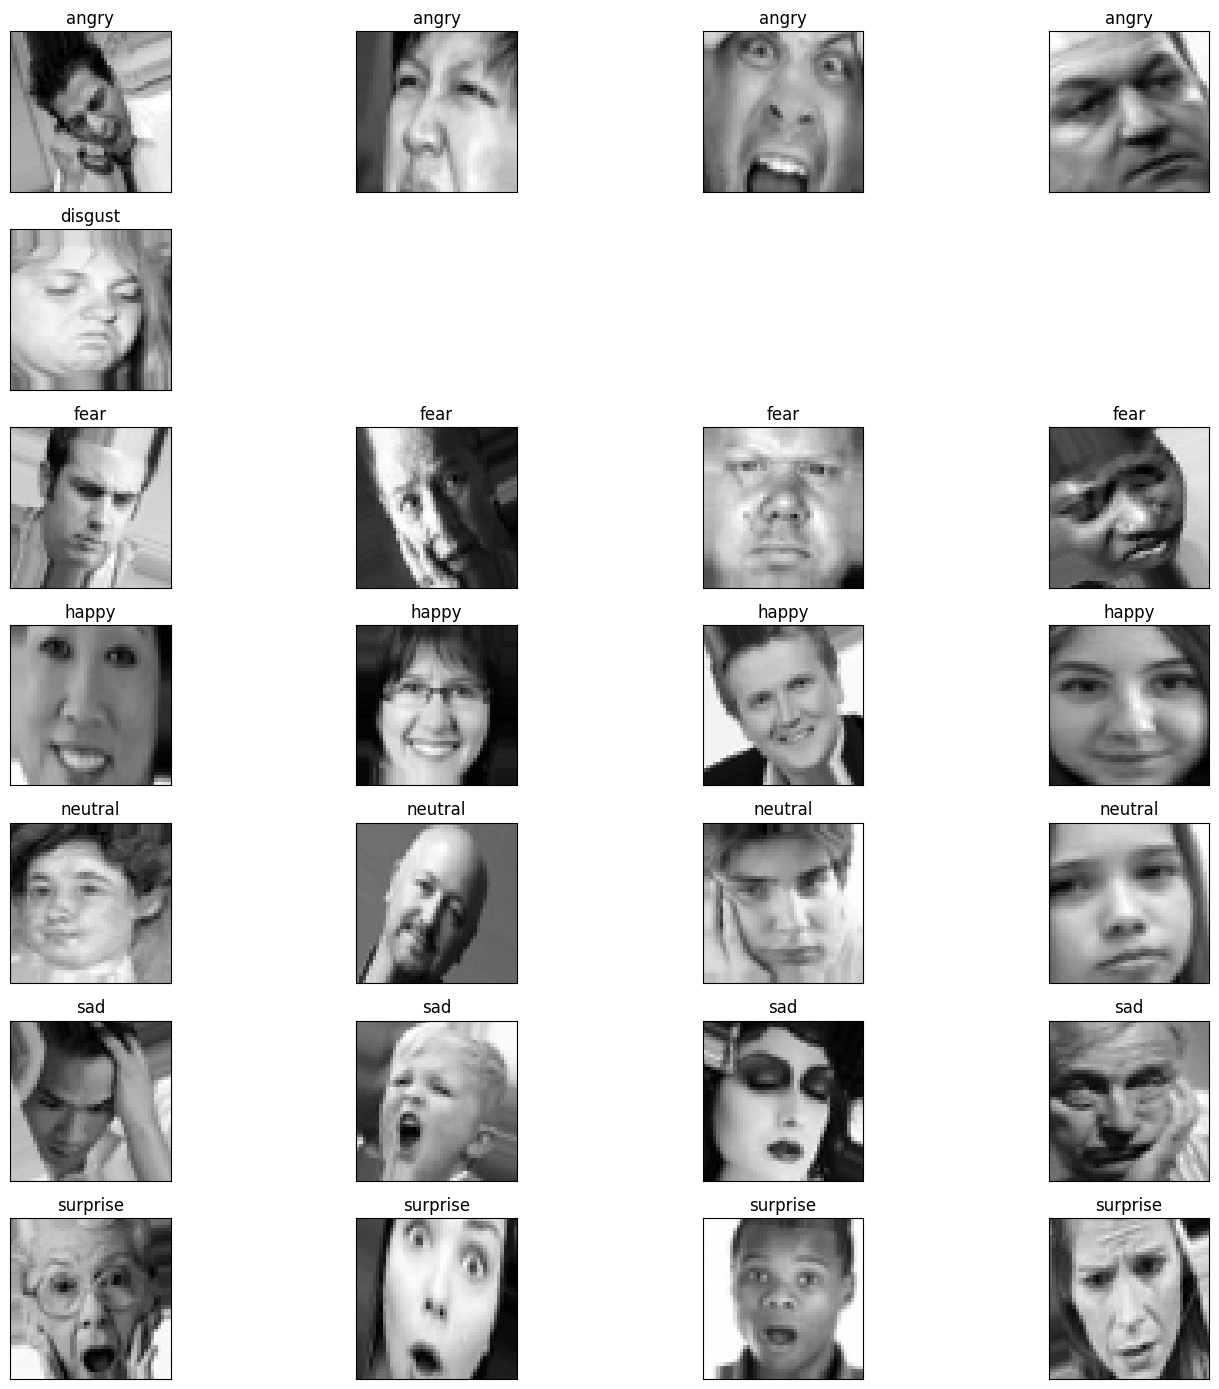

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor

def plot_images_for_label(label_idx):
    images = []
    train_generator.reset()
    for _ in range(num_images_per_class):
        img, label = train_generator.next()
        label_idx_array = np.argmax(label, axis=1)
        if len(label_idx_array) == 0:
            continue
        if label_idx not in label_idx_array:
            continue
        idx = np.where(label_idx_array == label_idx)[0][0]
        images.append(img[idx].reshape(IMG_HEIGHT, IMG_WIDTH))
    return images


# Plotting the images
fig = plt.figure(figsize=(14, 14))

num_images_per_class = 4  # Reduce the number of images per class
total_classes = len(class_labels)

# Use ThreadPoolExecutor for parallel processing
with ThreadPoolExecutor() as executor:
    # Submit tasks for each class label
    futures = [executor.submit(plot_images_for_label, label_idx) for label_idx in range(total_classes)]

    # Plot images as they become available
    for i, future in enumerate(futures):
        images = future.result()
        for j, image in enumerate(images):
            ax = fig.add_subplot(total_classes, num_images_per_class, i * num_images_per_class + j + 1)
            ax.imshow(image, cmap='gray')
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_title(class_labels[i])

plt.tight_layout()
plt.show()


#Sample Testing images

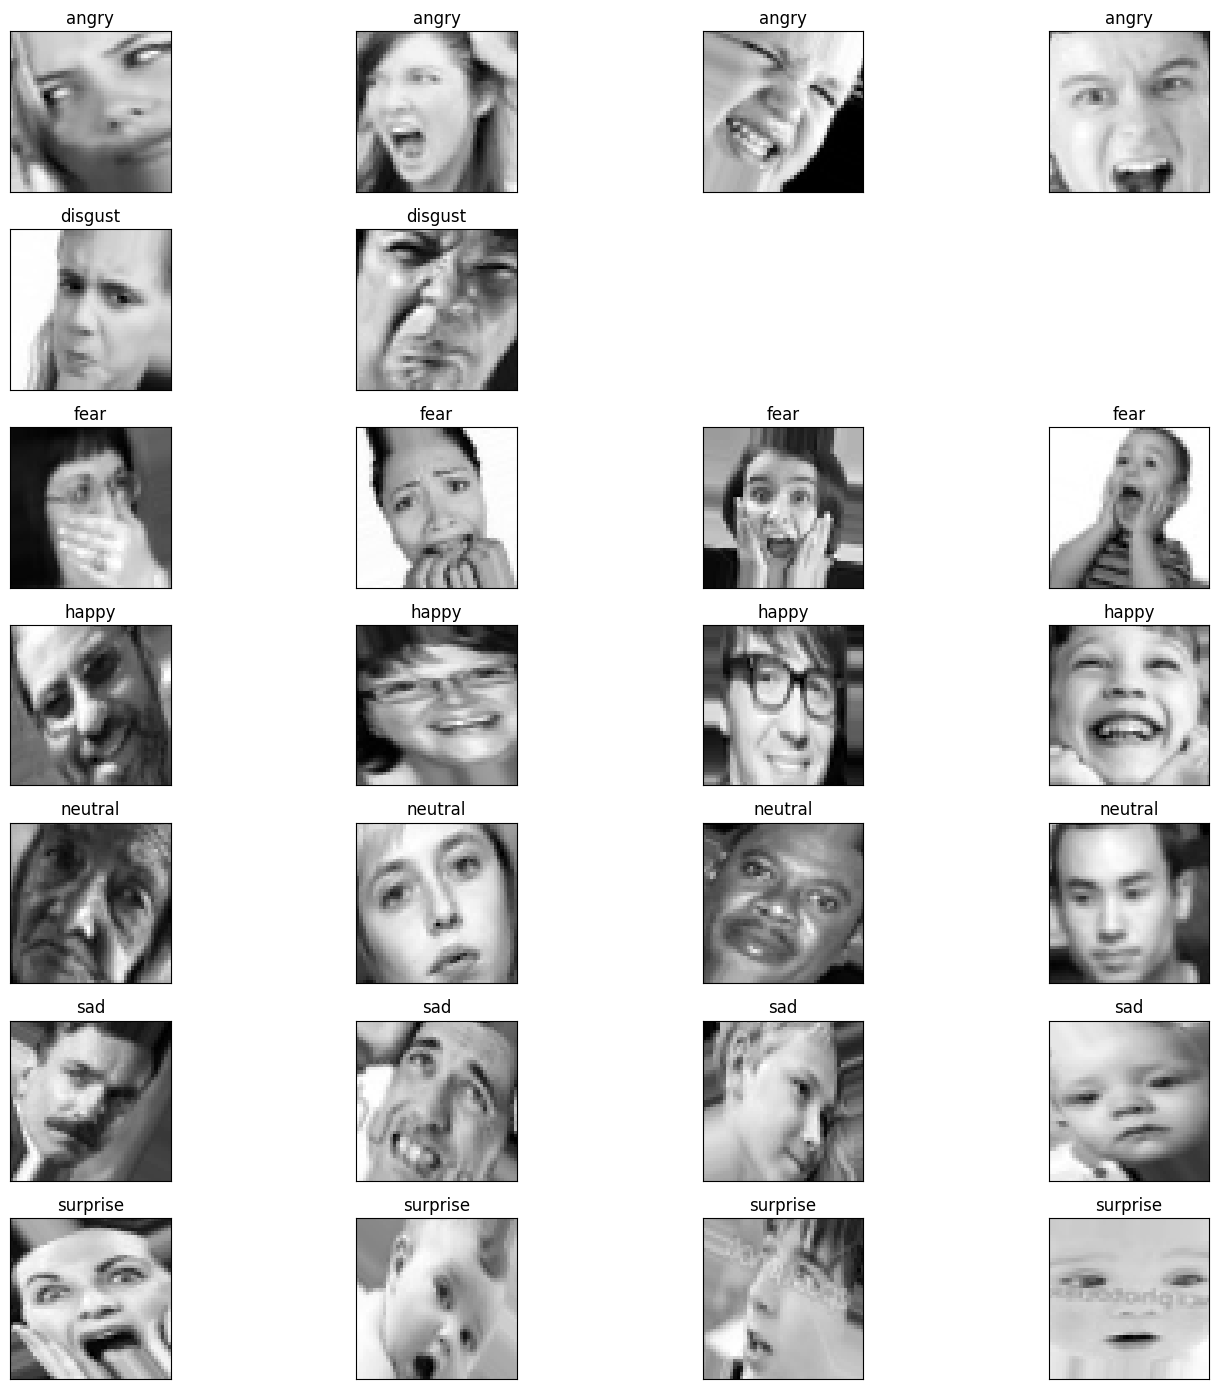

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor

def plot_images_for_label(label_idx):
    images = []
    train_generator.reset()
    for _ in range(num_images_per_class):
        img, label = train_generator.next()
        label_idx_array = np.argmax(label, axis=1)
        if len(label_idx_array) == 0:
            continue
        if label_idx not in label_idx_array:
            continue
        idx = np.where(label_idx_array == label_idx)[0][0]
        images.append(img[idx].reshape(IMG_HEIGHT, IMG_WIDTH))
    return images


# Plotting the images
fig = plt.figure(figsize=(14, 14))

num_images_per_class = 4  # Reduce the number of images per class
total_classes = len(class_labels)

# Use ThreadPoolExecutor for parallel processing
with ThreadPoolExecutor() as executor:
    # Submit tasks for each class label
    futures = [executor.submit(plot_images_for_label, label_idx) for label_idx in range(total_classes)]

    # Plot images as they become available
    for i, future in enumerate(futures):
        images = future.result()
        for j, image in enumerate(images):
            ax = fig.add_subplot(total_classes, num_images_per_class, i * num_images_per_class + j + 1)
            ax.imshow(image, cmap='gray')
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_title(class_labels[i])

plt.tight_layout()
plt.show()


#CNN model Architecture

In [ ]:


model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(7, activation='softmax'))

model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 22, 22, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 128)       0         
 g2D)                                                   

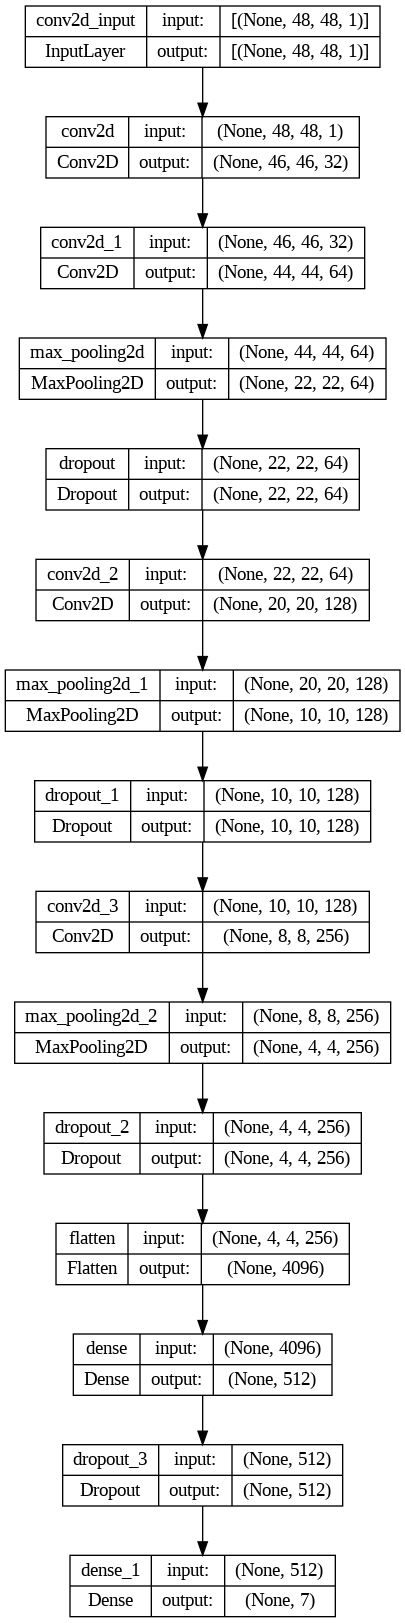

In [ ]:
from keras.utils import plot_model

# Plot the model architecture
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [ ]:
train_path = '/content/train'
test_path = '/content/test'

num_train_imgs = 0
for root, dirs, files in os.walk(train_path):
    num_train_imgs += len(files)

num_test_imgs = 0
for root, dirs, files in os.walk(test_path):
    num_test_imgs += len(files)

In [ ]:
num_train_imgs

28709

In [ ]:
num_test_imgs

7178

In [ ]:



epochs=50

history=model.fit(train_generator,
                steps_per_epoch=num_train_imgs//batch_size,
                epochs=epochs,
                validation_data=validation_generator,
                validation_steps=num_test_imgs//batch_size)


Epoch 1/50
897/897 [==============================] - 40s 37ms/step - loss: 1.7843 - accuracy: 0.2582 - val_loss: 1.6794 - val_accuracy: 0.3306
Epoch 2/50
897/897 [==============================] - 31s 34ms/step - loss: 1.6808 - accuracy: 0.3255 - val_loss: 1.5095 - val_accuracy: 0.4252
Epoch 3/50
897/897 [==============================] - 32s 36ms/step - loss: 1.5482 - accuracy: 0.3970 - val_loss: 1.3680 - val_accuracy: 0.4701
Epoch 4/50
897/897 [==============================] - 30s 34ms/step - loss: 1.4572 - accuracy: 0.4401 - val_loss: 1.3407 - val_accuracy: 0.4845
Epoch 5/50
897/897 [==============================] - 30s 34ms/step - loss: 1.4073 - accuracy: 0.4575 - val_loss: 1.2505 - val_accuracy: 0.5253
Epoch 6/50
897/897 [==============================] - 31s 34ms/step - loss: 1.3617 - accuracy: 0.4800 - val_loss: 1.2255 - val_accuracy: 0.5276
Epoch 7/50
897/897 [==============================] - 33s 36ms/step - loss: 1.3244 - accuracy: 0.4927 - val_loss: 1.1983 - val_accuracy:

In [ ]:
model.save('/content/drive/MyDrive/NITC_Projects/Deep_Learning_Projects/CNN_Face_emotion_detection/code&model/FER_ALL_img_epoch_50_feb_11')


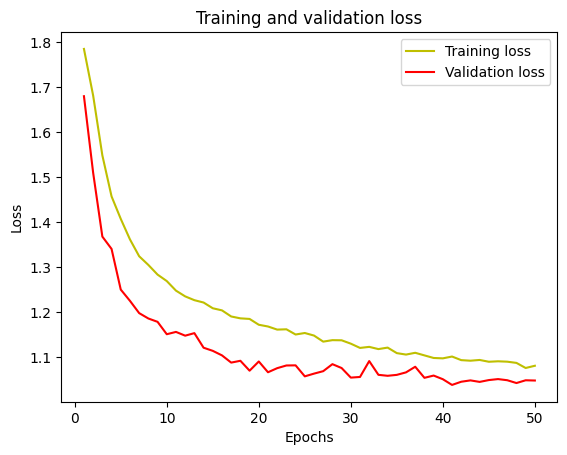

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc = history.history['accuracy']
#acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
#val_acc = history.history['val_accuracy']

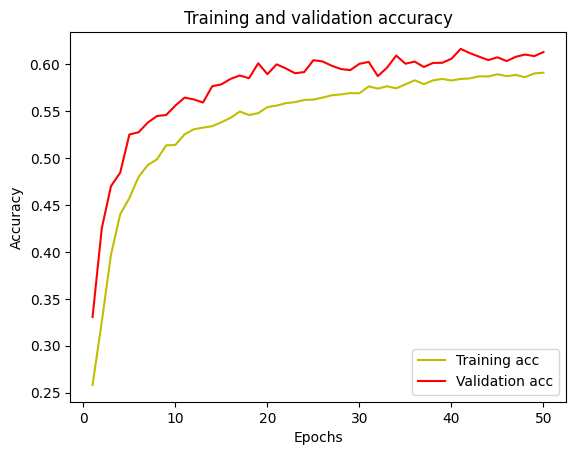

In [ ]:
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:

from keras.models import load_model
#Test the model
my_model = load_model('/content/drive/MyDrive/NITC_Projects/Deep_Learning_Projects/CNN_Face_emotion_detection/code&model/FER_ALL_img_epoch_50_feb_11', compile=False)

#Model Evaluation

---



Test images used

In [ ]:
validation_class_counts = count_images_per_class(validation_data_dir)
print("\nValidation Data Class-wise Image Counts:")
for class_name, count in validation_class_counts.items():
    print(f"{class_name}: {count} images")


Validation Data Class-wise Image Counts:
happy: 1774 images
neutral: 1233 images
fear: 1024 images
angry: 958 images
disgust: 111 images
sad: 1247 images
surprise: 831 images


#Sample Predictions

In [ ]:
import matplotlib.pyplot as plt

# Number of images to plot
num_images_to_plot = 5

import matplotlib.pyplot as plt

# Function to plot images
def plot_images(images, true_labels, predicted_labels):
    num_images = len(images)
    num_rows = 5
    num_cols = num_images // num_rows if num_images % num_rows == 0 else num_images // num_rows + 1
    plt.figure(figsize=(20, 20))
    for i in range(num_images):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f'True: {true_labels[i]}\nPredicted: {predicted_labels[i]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
class_labels=['angry','disgust', 'fear', 'happy','neutral','sad','surprise']

def plot_images(images, true_labels, predicted_labels):
    num_images = len(images)
    num_rows = 5
    num_cols = num_images // num_rows if num_images % num_rows == 0 else num_images // num_rows + 1
    plt.figure(figsize=(20, 20))
    for i in range(num_images):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f'True: {true_labels[i]}\nPredicted: {predicted_labels[i]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

images_to_plot = []
true_labels_to_plot = []
predicted_labels_to_plot = []






1/1 [==============================] - 0s 41ms/step


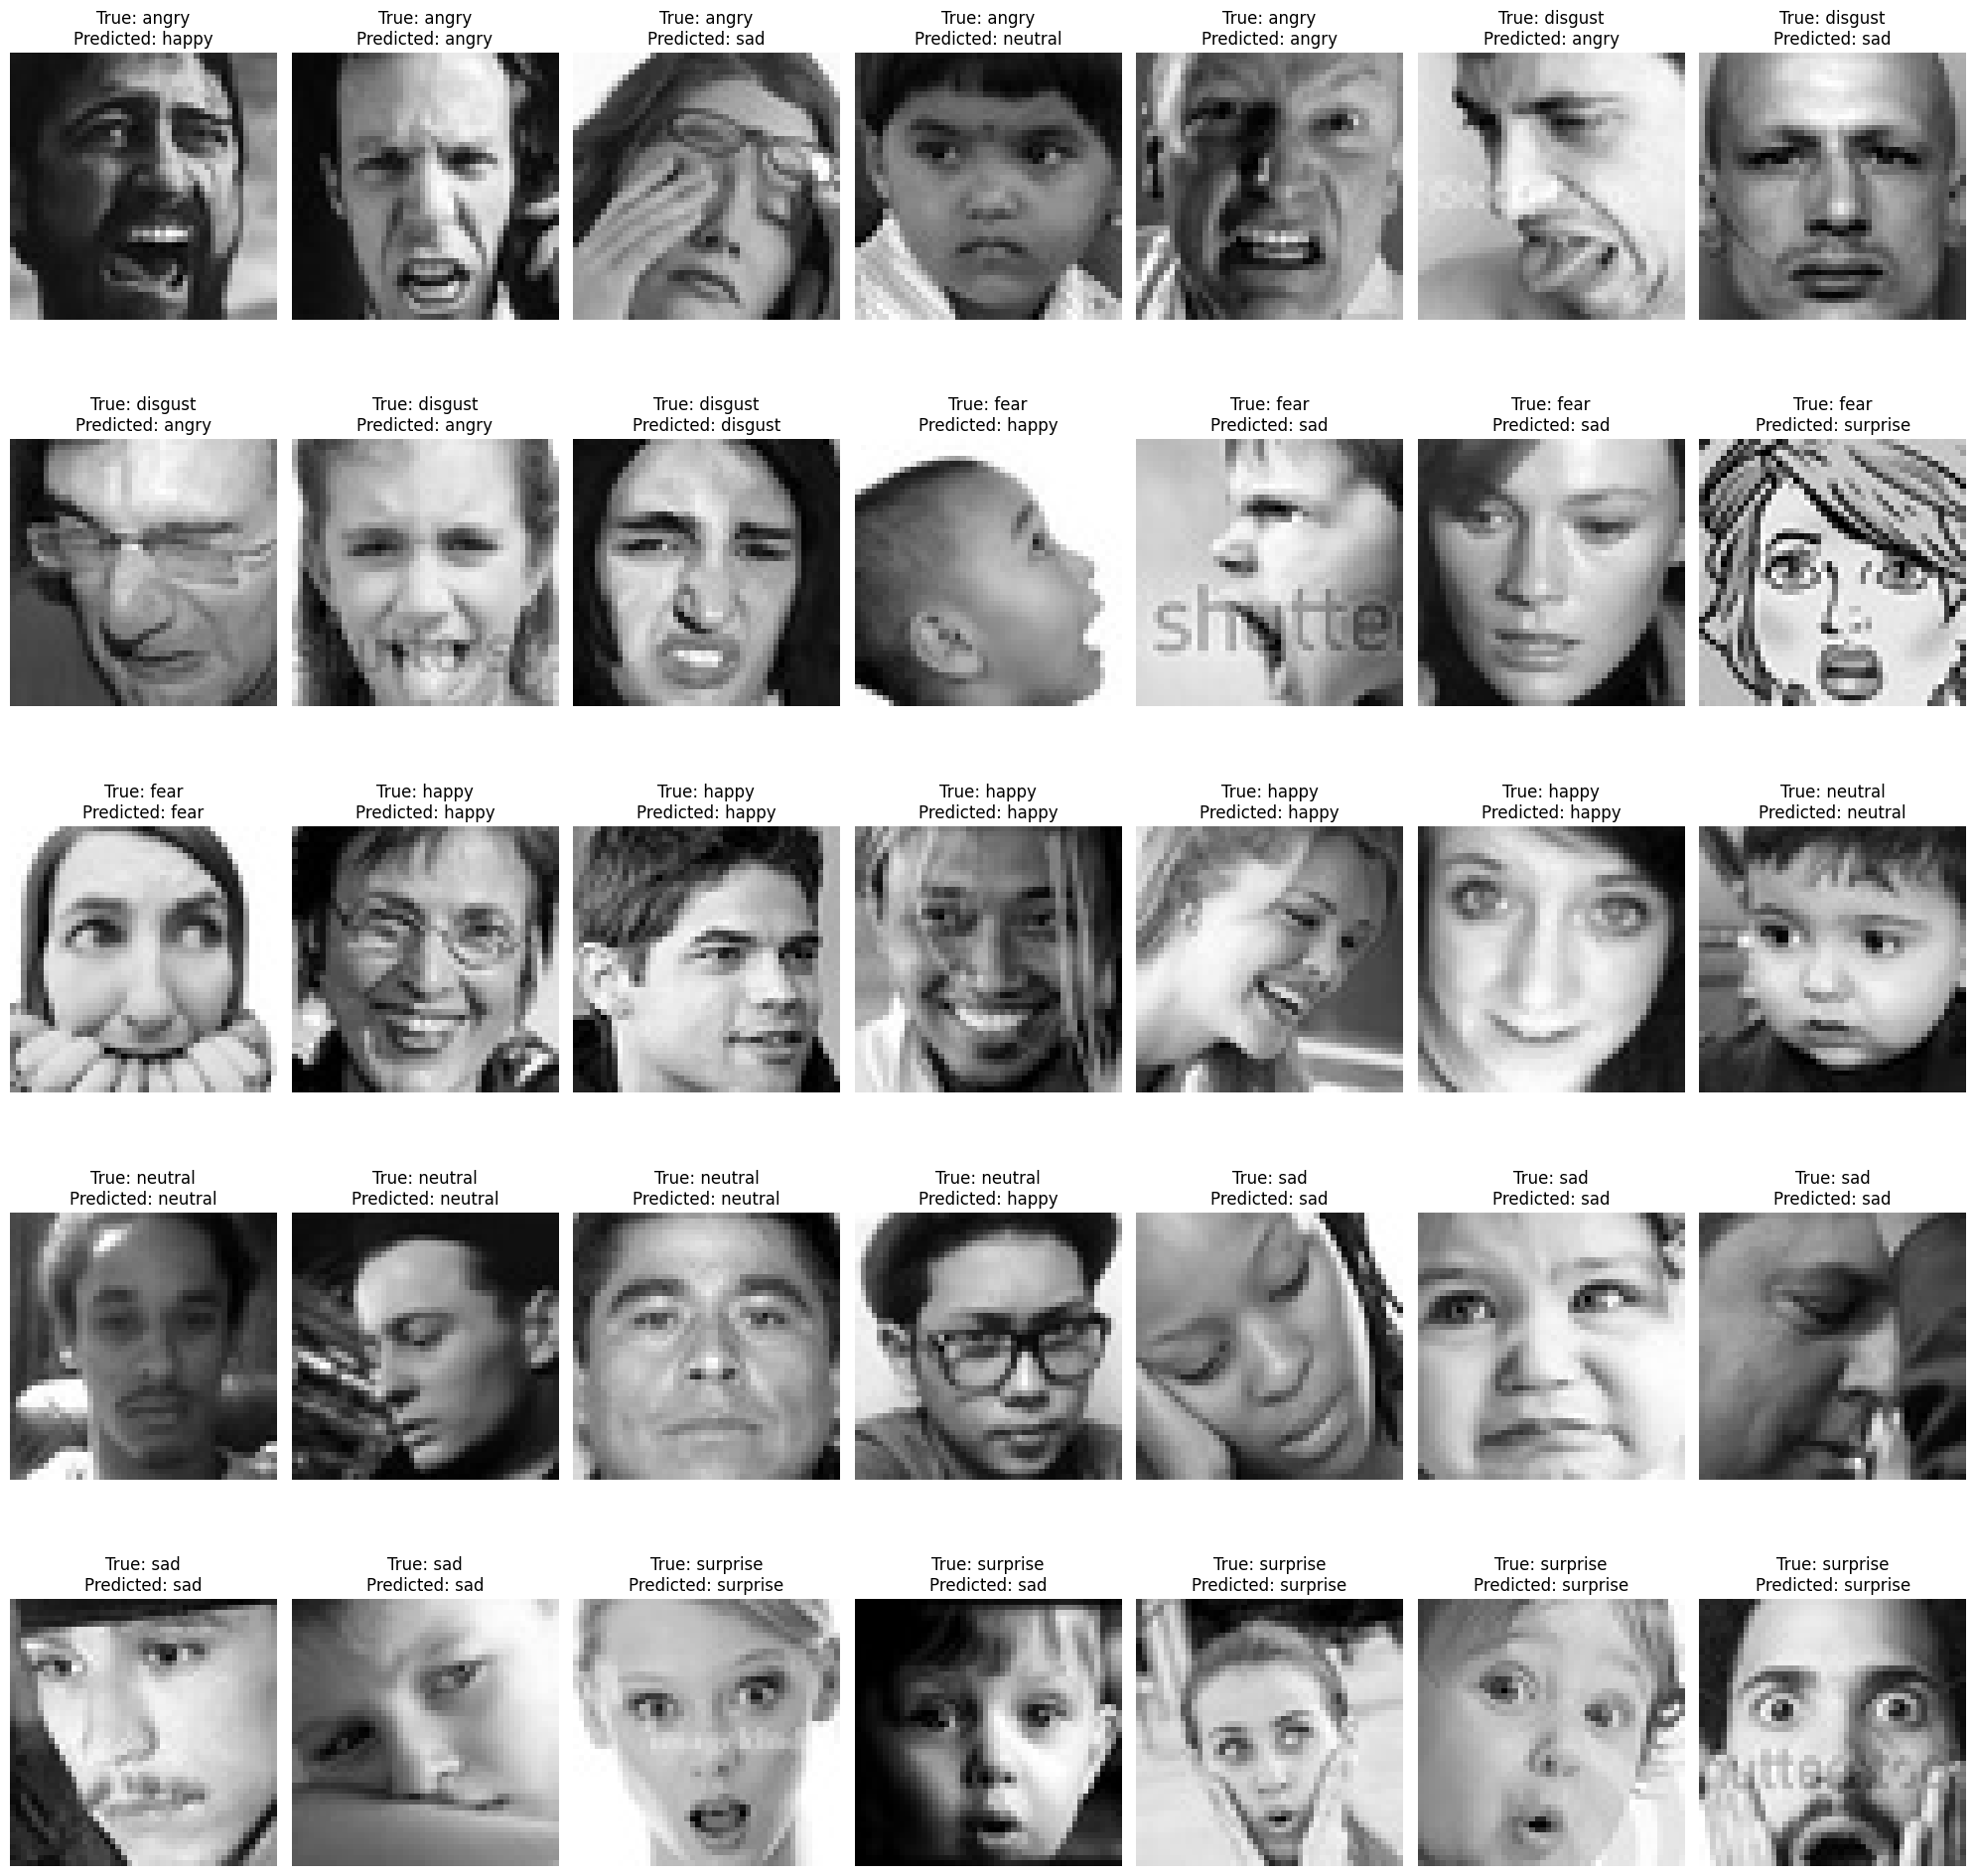

In [ ]:
for label in class_labels:
    folder_path = os.path.join(validation_data_dir, label)
    image_files = os.listdir(folder_path)[:num_images_to_plot]
    for image_file in image_files:
        img_path = os.path.join(folder_path, image_file)
        img = image.load_img(img_path, color_mode='grayscale', target_size=(IMG_HEIGHT, IMG_WIDTH))
        img_array = image.img_to_array(img)
        img_array /= 255.0  # Normalize pixel values
        images_to_plot.append(img_array)
        true_labels_to_plot.append(label)
        predicted_label = class_labels[np.argmax(my_model.predict(np.expand_dims(img_array, axis=0)))]
        predicted_labels_to_plot.append(predicted_label)
# Plot images with true and predicted labels
plot_images(images_to_plot, true_labels_to_plot, predicted_labels_to_plot)

#Confusion matrix and Classification report

157/157 [==============================] - 19s 122ms/step


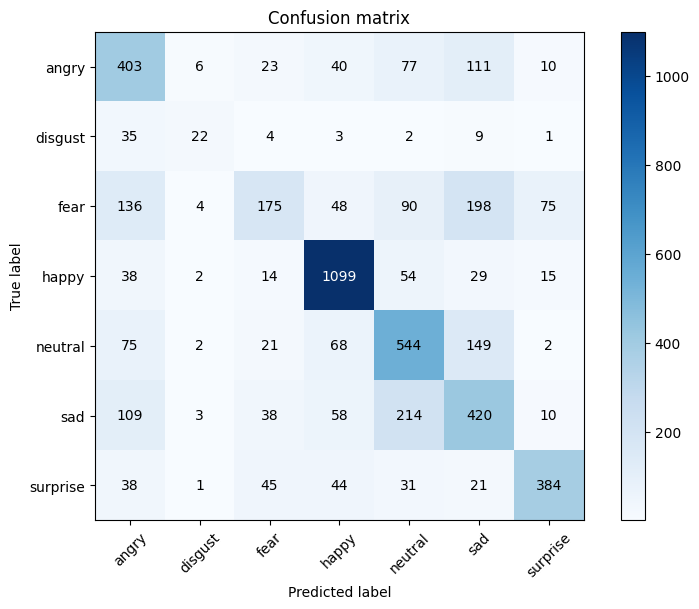

 
 
              precision    recall  f1-score   support

       angry       0.48      0.60      0.54       670
     disgust       0.55      0.29      0.38        76
        fear       0.55      0.24      0.33       726
       happy       0.81      0.88      0.84      1251
     neutral       0.54      0.63      0.58       861
         sad       0.45      0.49      0.47       852
    surprise       0.77      0.68      0.72       564

    accuracy                           0.61      5000
   macro avg       0.59      0.55      0.55      5000
weighted avg       0.61      0.61      0.60      5000



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Generate predictions for the test data
test_images, test_labels = test_generator.next()
predictions = my_model.predict(test_images)

# Convert predictions and true labels into class labels
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)

# Compute the confusion matrix
confusion_mat = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

fmt = 'd'
thresh = confusion_mat.max() / 2.
for i in range(confusion_mat.shape[0]):
    for j in range(confusion_mat.shape[1]):
        plt.text(j, i, format(confusion_mat[i, j], fmt),
                 ha="center", va="center",
                 color="white" if confusion_mat[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Print classification report
print(" ")
print(" ")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))


In [ ]:
import pandas as pd

# Count the number of correct predictions in each class
correct_predictions = np.sum(np.diag(confusion_mat))

# Count the number of images in each class
num_images_per_class = np.sum(confusion_mat, axis=1)

# Create a DataFrame
data = {
    'Class': class_labels,
    'Correct Predictions': np.diag(confusion_mat),
    'Total Images': num_images_per_class
}

df = pd.DataFrame(data)




In [ ]:
df

Class  Correct Predictions  Total Images
0     angry                  403           670
1   disgust                   22            76
2      fear                  175           726
3     happy                 1099          1251
4   neutral                  544           861
5       sad                  420           852
6  surprise                  384           564

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.models import load_model
from keras import models

def visualize_activations(model, img_path, class_labels):
    # Load a random image from the directory
    random_image = random.choice(os.listdir(img_path))
    img = image.load_img(os.path.join(img_path, random_image), target_size=(48, 48), color_mode='grayscale')

    # Convert the image to a numpy array
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)

    # Visualize the image
    plt.imshow(img_tensor[0].astype('uint8'), cmap='gray')
    plt.show()

    # Outputs of all layers
    layer_outputs = [layer.output for layer in model.layers]
    activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
    activations = activation_model.predict(img_tensor)

    # Predict class label
    predictions = model.predict(img_tensor)
    predicted_class_index = np.argmax(predictions)
    predicted_class = class_labels[predicted_class_index]
    print("Predicted class:", predicted_class)

    # Plot activations for convolutional layers
    for i, layer_activation in enumerate(activations):
        if 'conv2d' in model.layers[i].name.lower():
            print("Layer:", model.layers[i].name)
            print("Activation Shape:", layer_activation.shape)
            plt.figure(figsize=(20, 8))
            for j in range(min(16, layer_activation.shape[-1])):
                plt.subplot(4, 8, j + 1)
                plt.imshow(layer_activation[0, :, :, j], cmap='viridis')
                plt.axis('off')
            plt.show()




Function for visualizing all activation output of all layer

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.models import load_model
from keras import models
import random
import os

def visualize_activations(model, img_path, class_labels, variance_threshold=0.1):
    # Load a random image from the directory
    random_image = random.choice(os.listdir(img_path))
    img = image.load_img(os.path.join(img_path, random_image), target_size=(48, 48), color_mode='grayscale')

    # Convert the image to a numpy array
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)

    # Visualize the image
    plt.imshow(img_tensor[0].astype('uint8'), cmap='gray')
    plt.show()

    # Outputs of all layers
    layer_outputs = [layer.output for layer in model.layers]
    activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
    activations = activation_model.predict(img_tensor)

    # Predict class label
    predictions = model.predict(img_tensor)
    predicted_class_index = np.argmax(predictions)
    predicted_class = class_labels[predicted_class_index]
    print("Predicted class:", predicted_class)

    # Plot activations for convolutional layers
    for i, layer_activation in enumerate(activations):
        if 'conv2d' in model.layers[i].name.lower():
            print("Layer:", model.layers[i].name)
            print("Activation Shape:", layer_activation.shape)
            plt.figure(figsize=(15, 15))
            num_feature_maps = layer_activation.shape[-1]
            rows = int(np.ceil(np.sqrt(num_feature_maps)))  # Calculate number of rows needed
            cols = int(np.ceil(num_feature_maps / rows))  # Calculate number of columns needed
            subplot_index = 1
            for j in range(num_feature_maps):
                activation_map = layer_activation[0, :, :, j]
                variance = np.var(activation_map)
                if variance > variance_threshold:
                    plt.subplot(rows, cols, subplot_index)
                    plt.imshow(activation_map, cmap='viridis')
                    plt.title(str(j+1))
                    plt.axis('off')
                    subplot_index += 1
            plt.tight_layout()  # Adjust subplot layout to minimize overlapping
            plt.show()


Function for visualizing  output of selected  layer

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.models import load_model
from keras import models
import random
import os

def layerwise_visualize(model, img_path, class_labels, layer_name=None, image_number=None, variance_threshold=0.1):
    # If image_number is not specified, choose a random image
    if image_number is None:
        random_image = random.choice(os.listdir(img_path))
    else:
        image_list = sorted(os.listdir(img_path))
        if image_number < 1 or image_number > len(image_list):
            raise ValueError("Invalid image number. Please provide a number between 1 and", len(image_list))
        random_image = image_list[image_number - 1]  # Adjust index to match list index

    # Load the image
    img = image.load_img(os.path.join(img_path, random_image), target_size=(48, 48), color_mode='grayscale')

    # Convert the image to a numpy array
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)

    # Visualize the image
    plt.imshow(img_tensor[0].astype('uint8'), cmap='gray')
    plt.show()

    # Outputs of all layers
    layer_outputs = [layer.output for layer in model.layers]
    activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
    activations = activation_model.predict(img_tensor)

    # Predict class label
    predictions = model.predict(img_tensor)
    predicted_class_index = np.argmax(predictions)
    predicted_class = class_labels[predicted_class_index]
    print("Predicted class:", predicted_class)

    # Plot activations for the specified layer
    for i, layer_activation in enumerate(activations):
        if layer_name is not None and layer_name.lower() in model.layers[i].name.lower():
            print("Layer:", model.layers[i].name)
            print("Activation Shape:", layer_activation.shape)
            plt.figure(figsize=(15, 15))
            num_feature_maps = layer_activation.shape[-1]
            rows = int(np.ceil(np.sqrt(num_feature_maps)))  # Calculate number of rows needed
            cols = int(np.ceil(num_feature_maps / rows))  # Calculate number of columns needed
            subplot_index = 1
            for j in range(num_feature_maps):
                activation_map = layer_activation[0, :, :, j]
                variance = np.var(activation_map)
                if variance > variance_threshold:
                    plt.subplot(rows, cols, subplot_index)
                    plt.imshow(activation_map, cmap='viridis')
                    plt.title(str(j+1))
                    plt.axis('off')
                    subplot_index += 1
            plt.tight_layout()  # Adjust subplot layout to minimize overlapping
            plt.show()





In this Keras Sequential model, the layer names are automatically generated based on the type of layer and their sequence in the model .The possible layer names for the provided model:

    'conv2d'
    'conv2d_1'
    'conv2d_2'
    'conv2d_3'
    'max_pooling2d'
    'max_pooling2d_1'
    'max_pooling2d_2'
    'flatten'
    'dense'
    'dense_1'

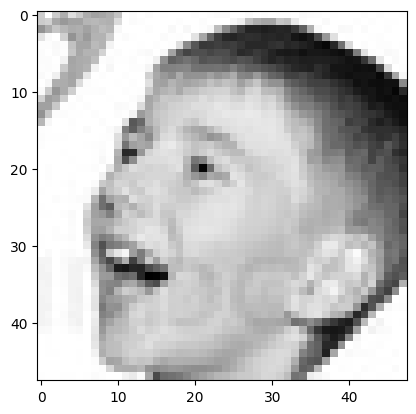

1/1 [==============================] - 0s 44ms/step
Predicted class: happy
Layer: conv2d
Activation Shape: (1, 46, 46, 32)


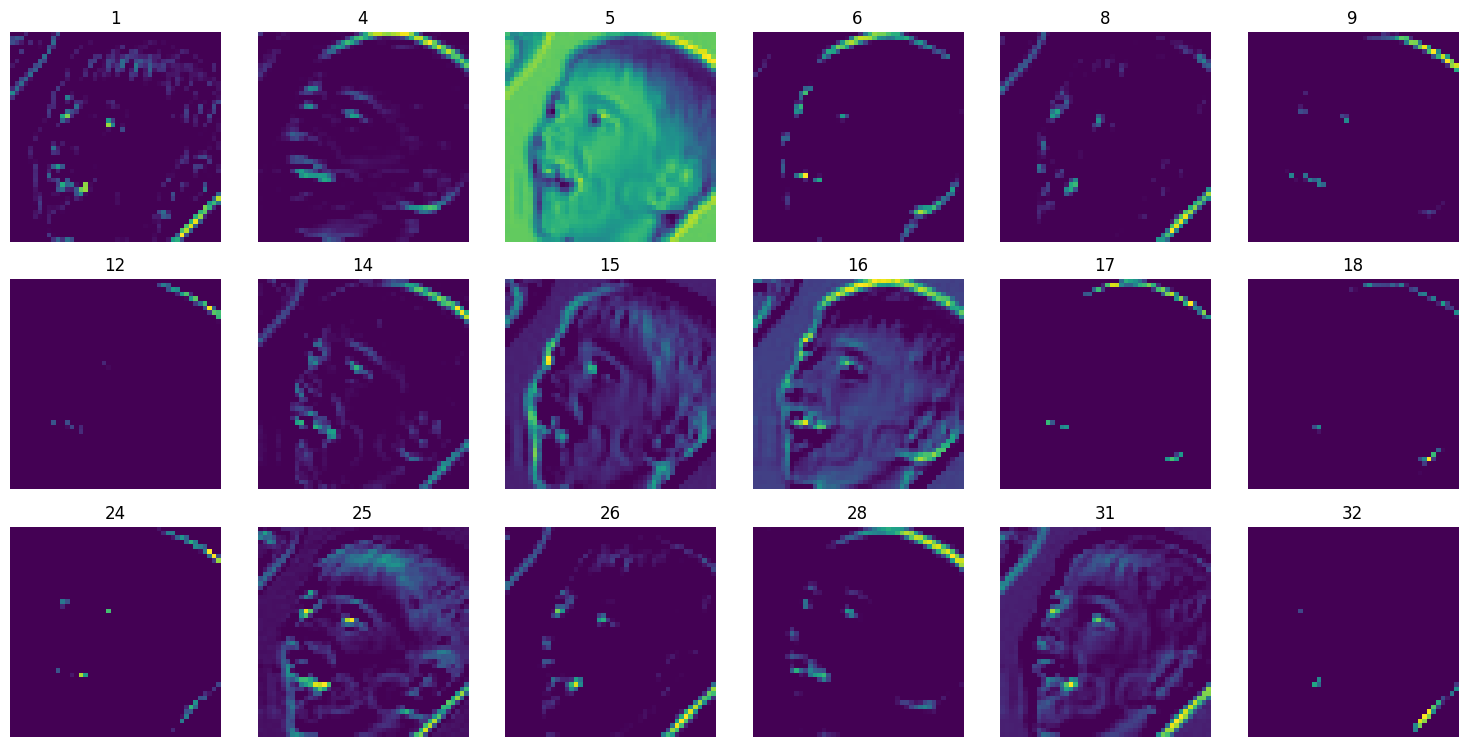

Layer: conv2d_1
Activation Shape: (1, 44, 44, 64)


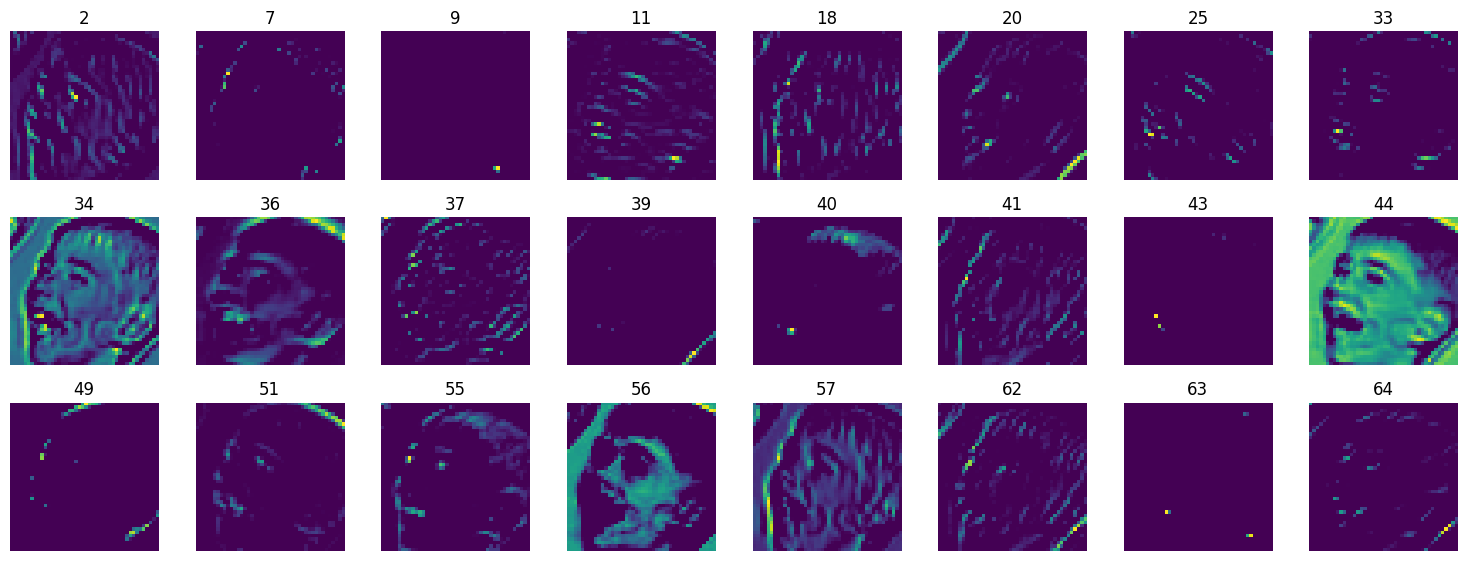

Layer: conv2d_2
Activation Shape: (1, 20, 20, 128)


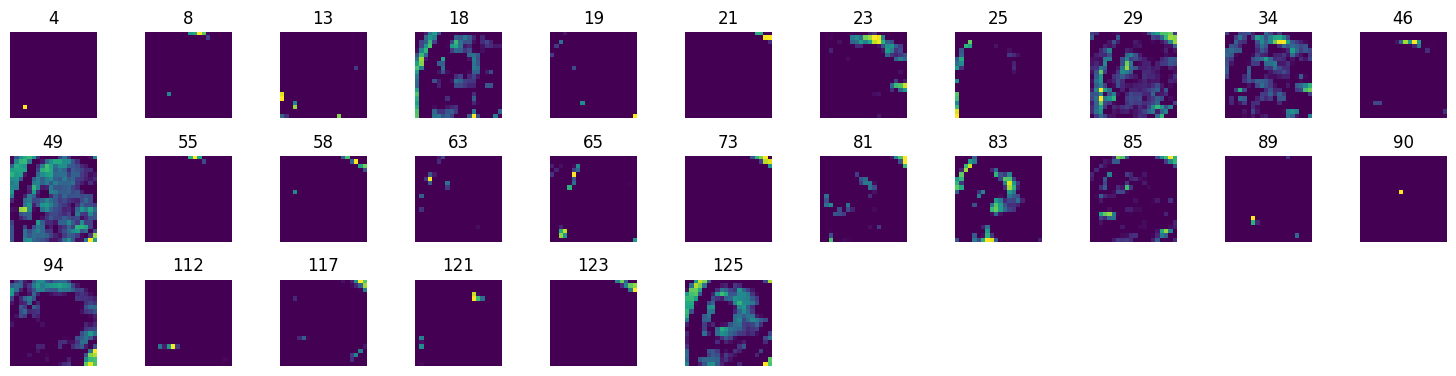

Layer: conv2d_3
Activation Shape: (1, 8, 8, 256)


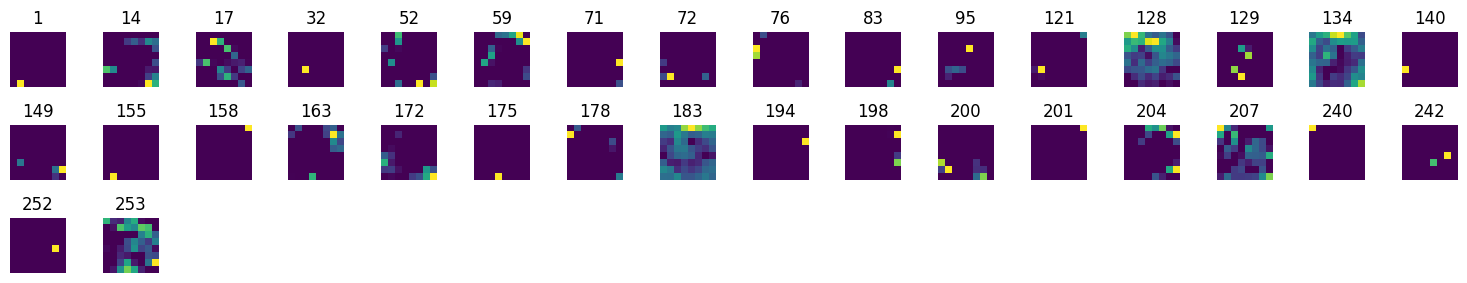

In [ ]:

model = my_model  # Provide your model
img_path = '/content/drive/MyDrive/NITC_Projects/Deep_Learning_Projects/CNN_Face_emotion_detection/datasets/face_emotion_50im_each/train/happy'
class_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

visualize_activations(model, img_path, class_labels)


In [ ]:
import numpy as np
import random
import tensorflow as tf

# Fix random seed for reproducibility
random_seed = 42
np.random.seed(random_seed)
random.seed(random_seed)
tf.random.set_seed(random_seed)


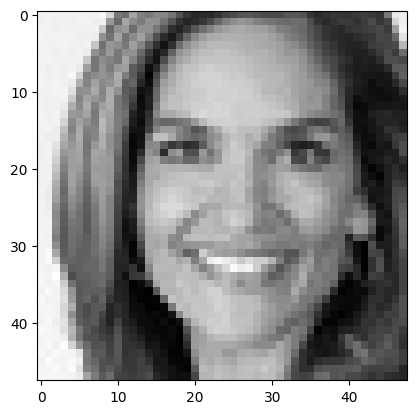

1/1 [==============================] - 0s 43ms/step
Predicted class: happy
Layer: conv2d_1
Activation Shape: (1, 44, 44, 64)


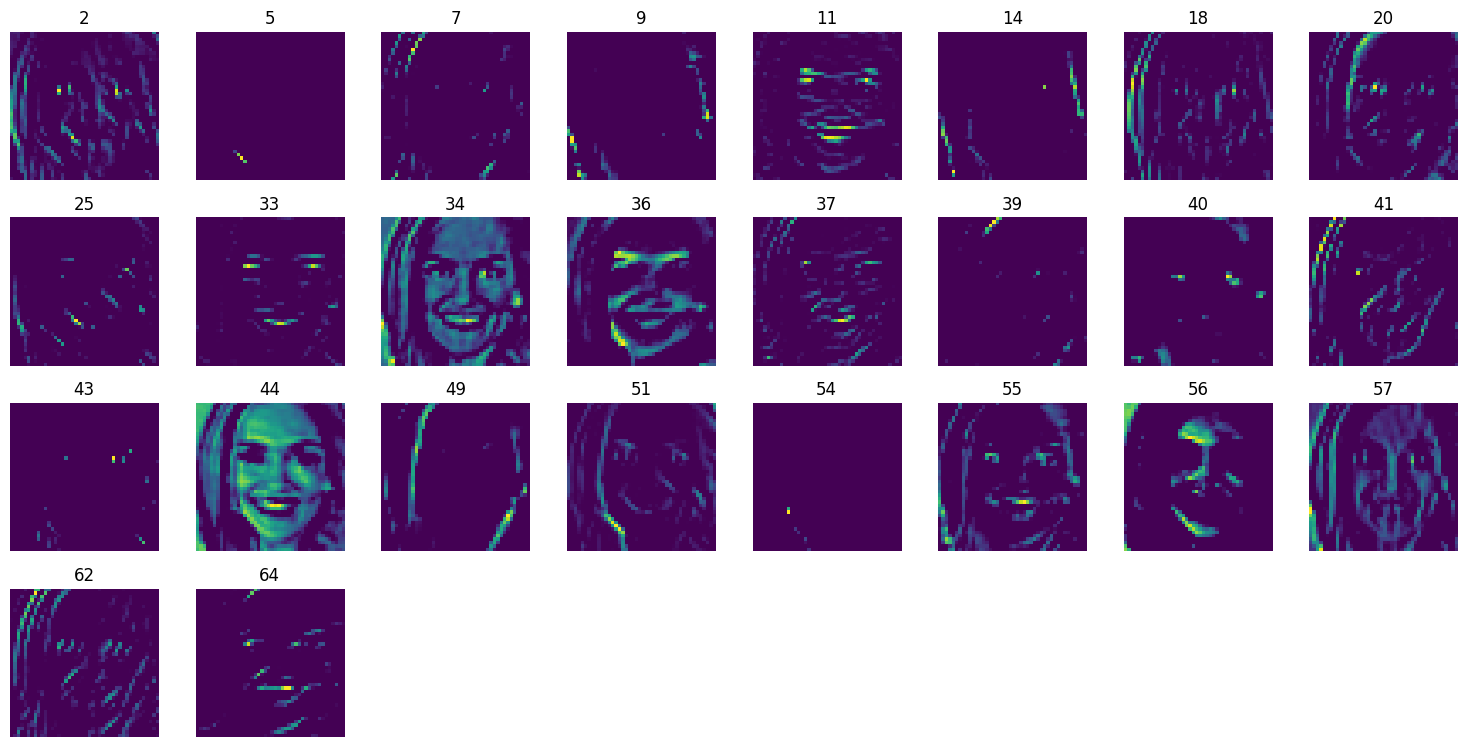

In [ ]:

img_path = '/content/drive/MyDrive/NITC_Projects/Deep_Learning_Projects/CNN_Face_emotion_detection/datasets/face_emotion_50im_each/train/happy'


layerwise_visualize(model, img_path, class_labels,'conv2d_1',2)

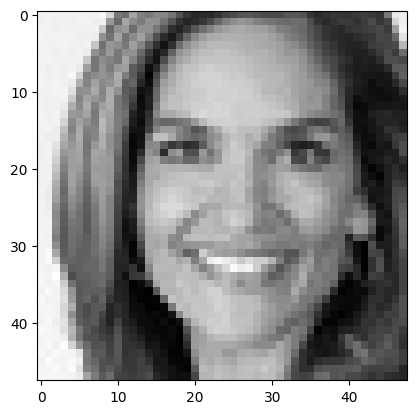

1/1 [==============================] - 0s 48ms/step
Predicted class: happy
Layer: max_pooling2d_2
Activation Shape: (1, 4, 4, 256)


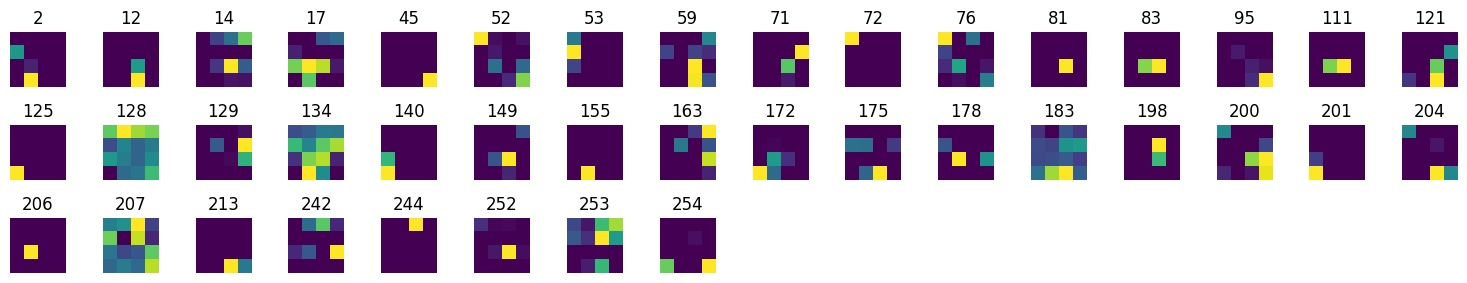

In [ ]:

img_path = '/content/drive/MyDrive/NITC_Projects/Deep_Learning_Projects/CNN_Face_emotion_detection/datasets/face_emotion_50im_each/train/happy'


layerwise_visualize(model, img_path, class_labels,'max_pooling2d_2',2)

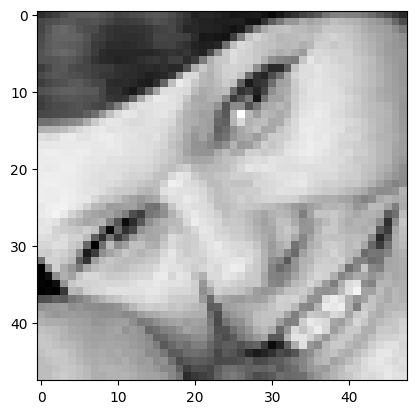

1/1 [==============================] - 0s 25ms/step
Predicted class: happy
Layer: max_pooling2d_2
Activation Shape: (1, 4, 4, 256)


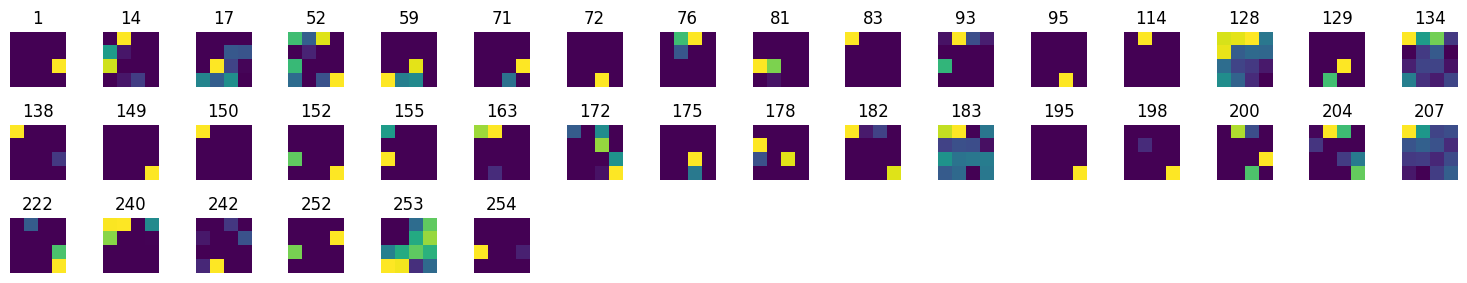

In [ ]:
img_path = '/content/drive/MyDrive/NITC_Projects/Deep_Learning_Projects/CNN_Face_emotion_detection/datasets/face_emotion_50im_each/train/happy'


layerwise_visualize(model, img_path, class_labels,'max_pooling2d_2',3)

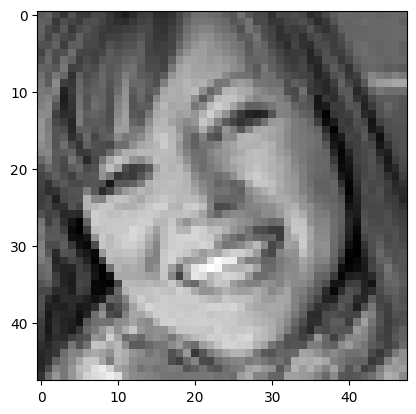

1/1 [==============================] - 0s 40ms/step
Predicted class: happy
Layer: max_pooling2d_2
Activation Shape: (1, 4, 4, 256)


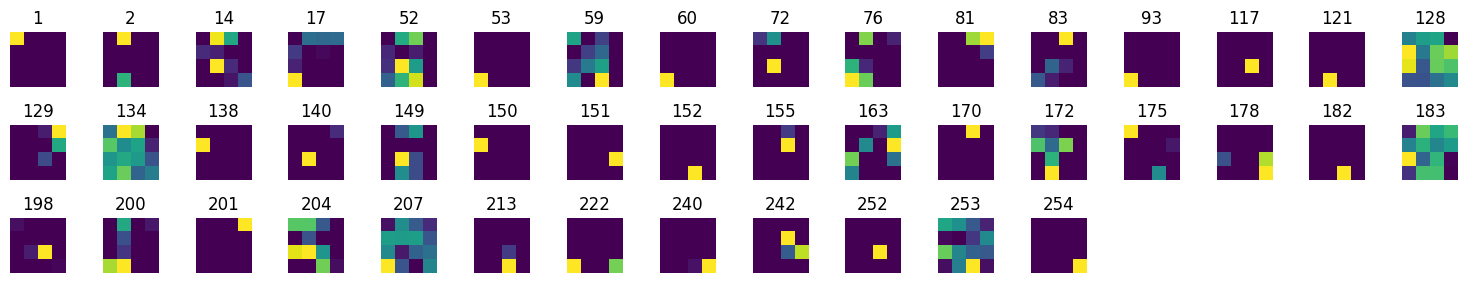

In [ ]:
img_path = '/content/drive/MyDrive/NITC_Projects/Deep_Learning_Projects/CNN_Face_emotion_detection/datasets/face_emotion_50im_each/train/happy'


layerwise_visualize(model, img_path, class_labels,'max_pooling2d_2',20)

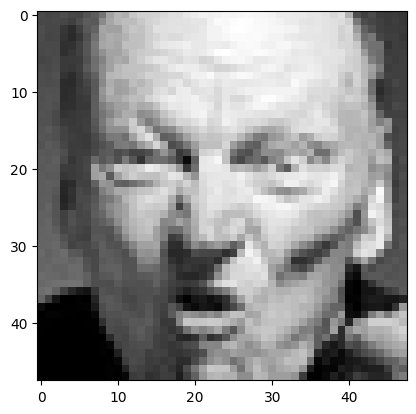

1/1 [==============================] - 0s 38ms/step
Predicted class: angry
Layer: max_pooling2d_2
Activation Shape: (1, 4, 4, 256)


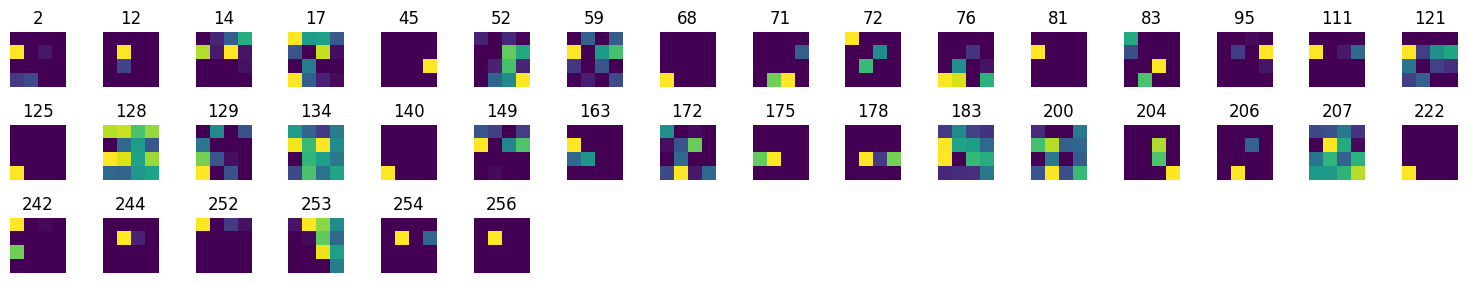

In [ ]:
img_path = '/content/drive/MyDrive/NITC_Projects/Deep_Learning_Projects/CNN_Face_emotion_detection/datasets/face_emotion_50im_each/train/angry'


layerwise_visualize(model, img_path, class_labels,'max_pooling2d_2',20)

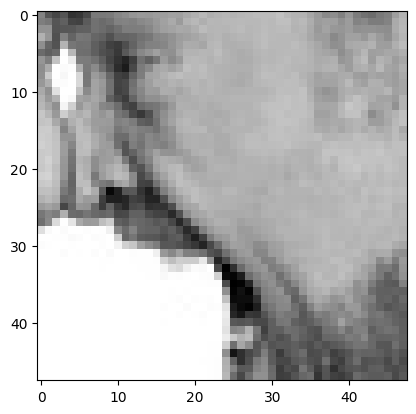

1/1 [==============================] - 0s 43ms/step
Predicted class: angry
Layer: max_pooling2d_2
Activation Shape: (1, 4, 4, 256)


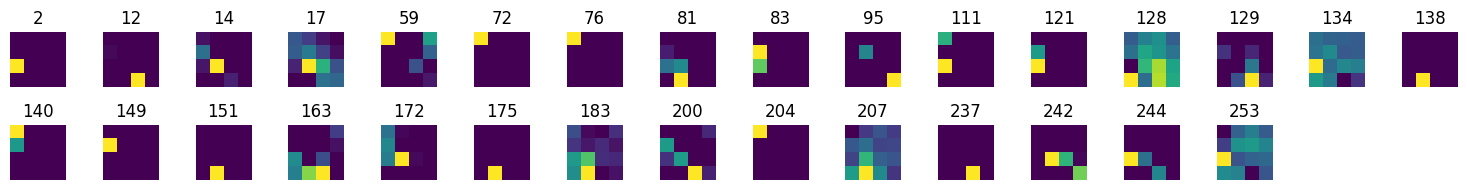

In [ ]:
img_path = '/content/drive/MyDrive/NITC_Projects/Deep_Learning_Projects/CNN_Face_emotion_detection/datasets/face_emotion_50im_each/train/angry'


layerwise_visualize(model, img_path, class_labels,'max_pooling2d_2',5)

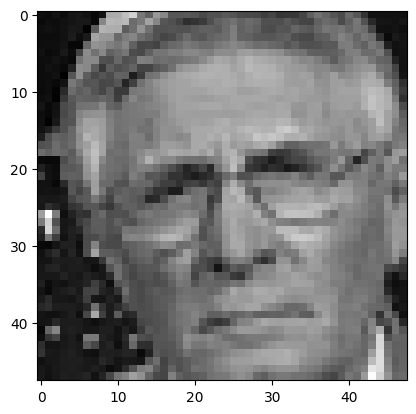

1/1 [==============================] - 0s 46ms/step
Predicted class: happy
Layer: max_pooling2d_2
Activation Shape: (1, 4, 4, 256)


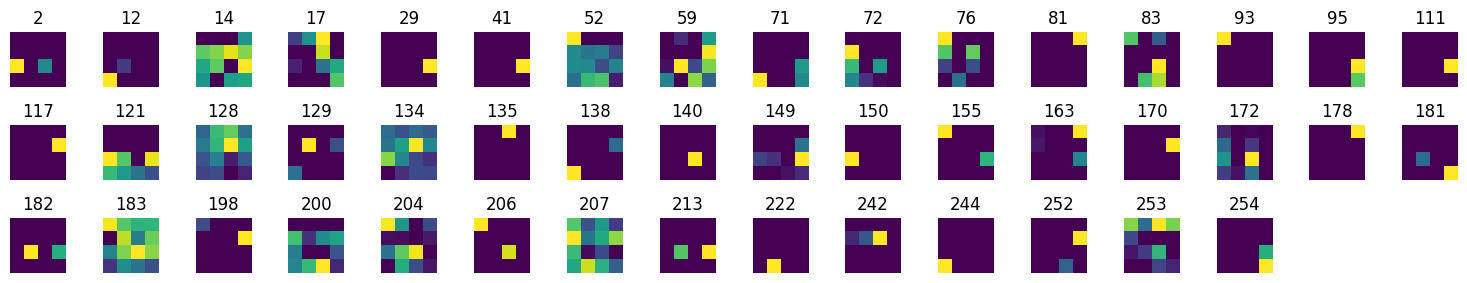

In [ ]:
img_path = '/content/drive/MyDrive/NITC_Projects/Deep_Learning_Projects/CNN_Face_emotion_detection/datasets/face_emotion_50im_each/train/angry'


layerwise_visualize(model, img_path, class_labels,'max_pooling2d_2',3)

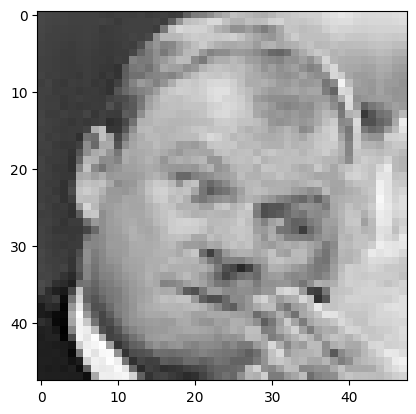

1/1 [==============================] - 0s 88ms/step
Predicted class: angry
Layer: max_pooling2d_2
Activation Shape: (1, 4, 4, 256)


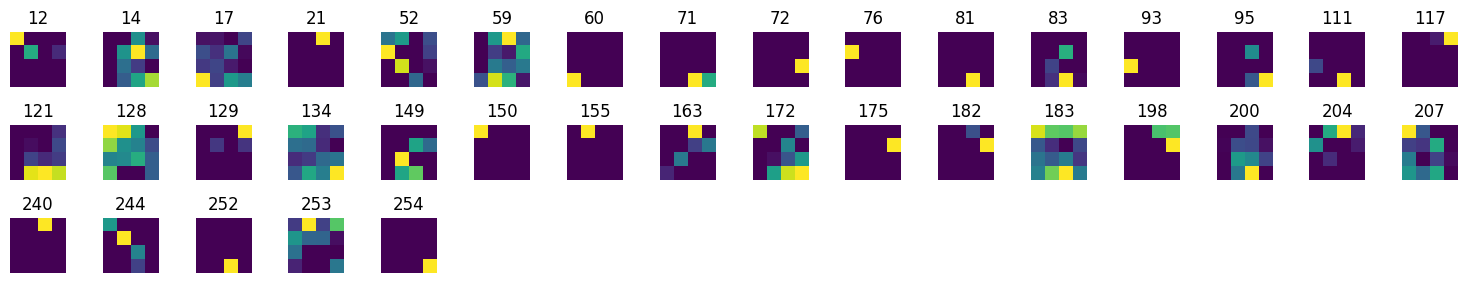

In [ ]:
img_path = '/content/drive/MyDrive/NITC_Projects/Deep_Learning_Projects/CNN_Face_emotion_detection/datasets/face_emotion_50im_each/train/angry'


layerwise_visualize(model, img_path, class_labels,'max_pooling2d_2',28)

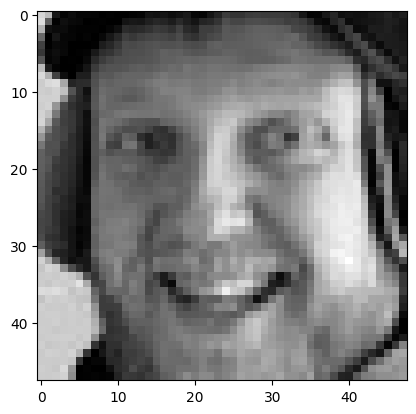

1/1 [==============================] - 0s 26ms/step
Predicted class: surprise
Layer: conv2d
Activation Shape: (1, 46, 46, 32)


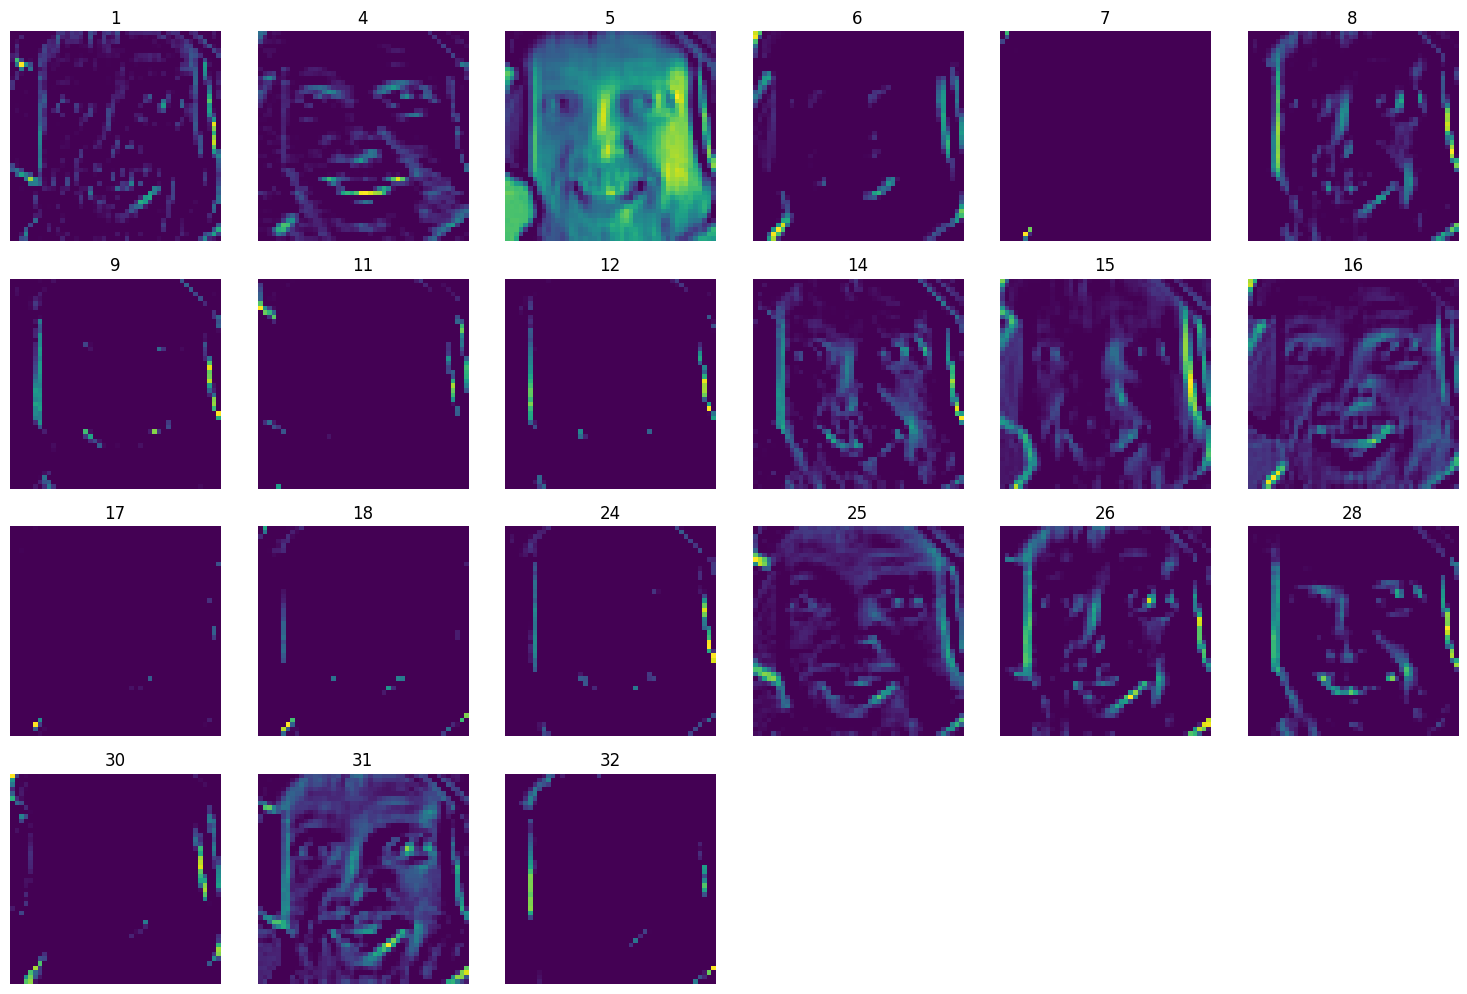

Layer: conv2d_1
Activation Shape: (1, 44, 44, 64)


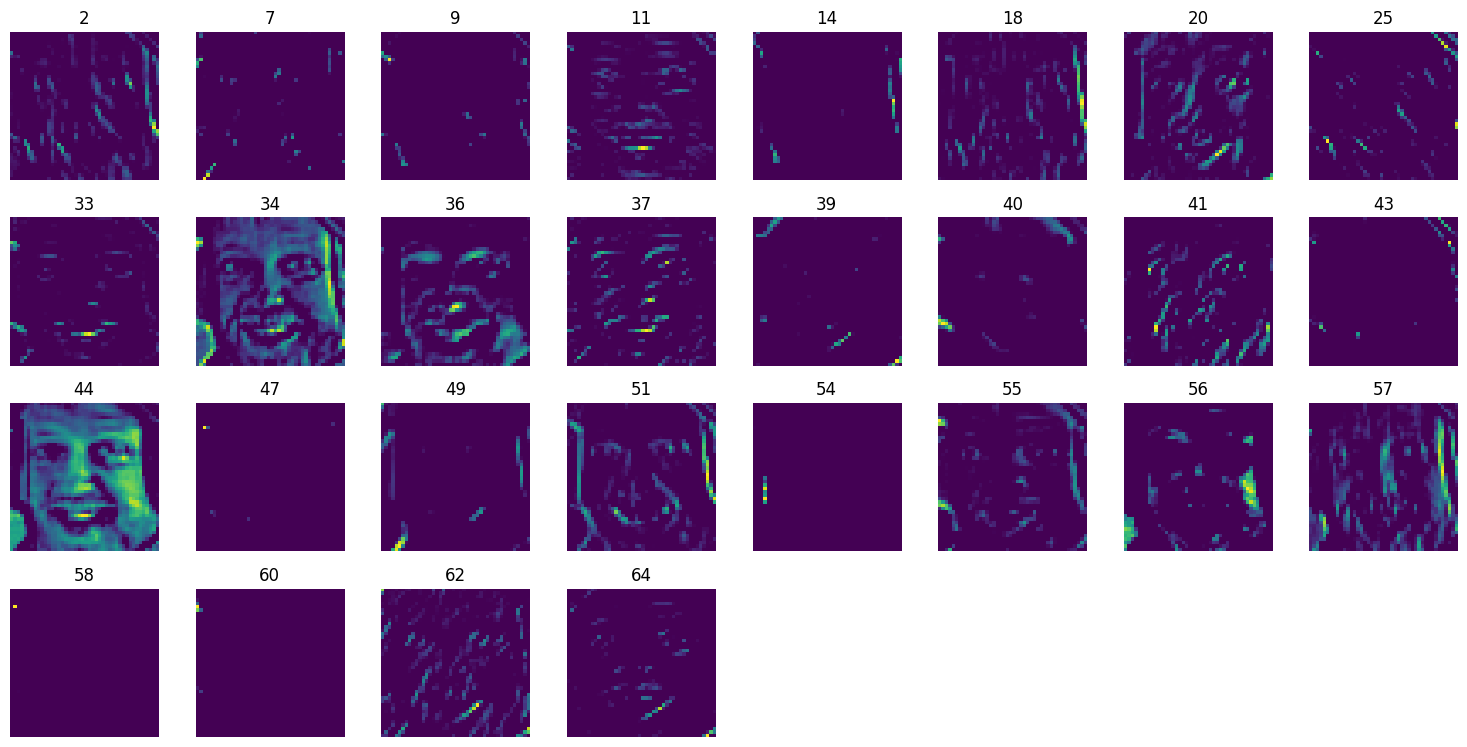

Layer: conv2d_2
Activation Shape: (1, 20, 20, 128)


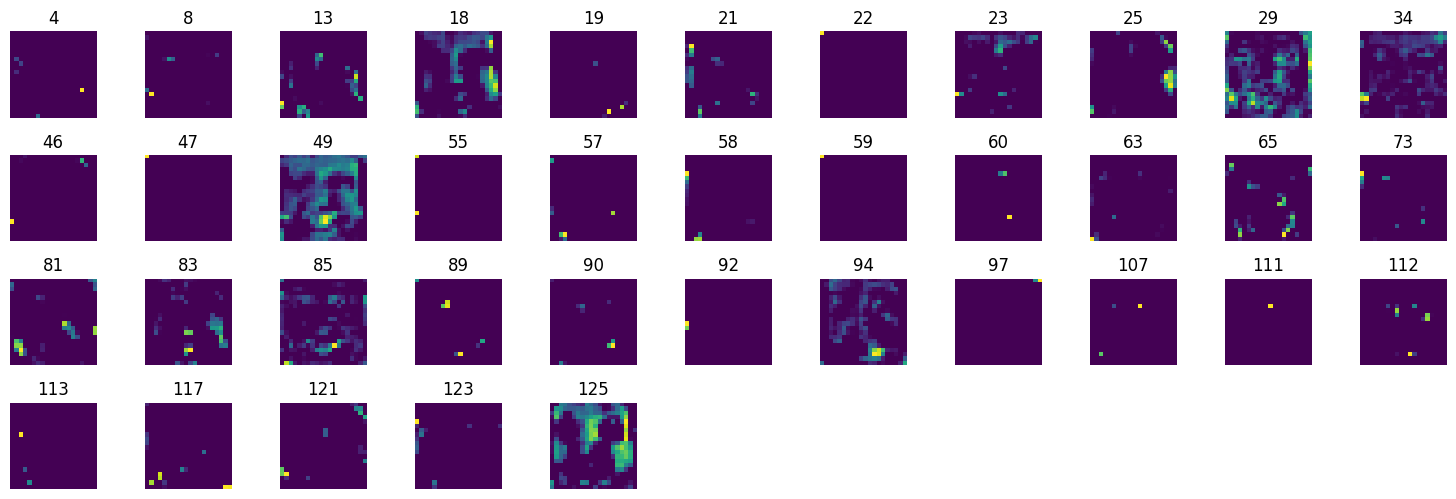

Layer: conv2d_3
Activation Shape: (1, 8, 8, 256)


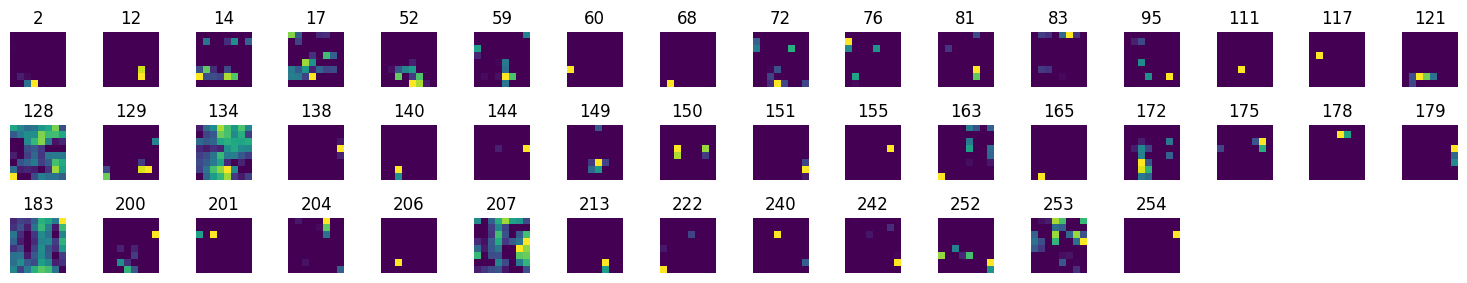

In [ ]:
img_path = '/content/drive/MyDrive/NITC_Projects/Deep_Learning_Projects/CNN_Face_emotion_detection/datasets/face_emotion_50im_each/train/happy'


visualize_activations(model, img_path, class_labels)

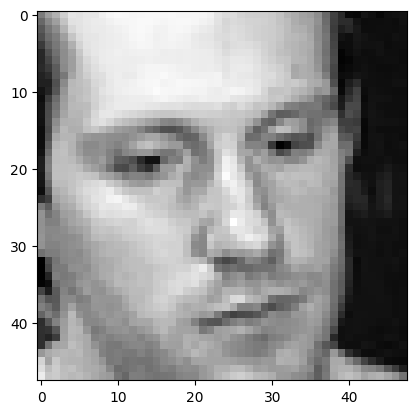

1/1 [==============================] - 0s 29ms/step
Predicted class: fear
Layer: conv2d
Activation Shape: (1, 46, 46, 32)


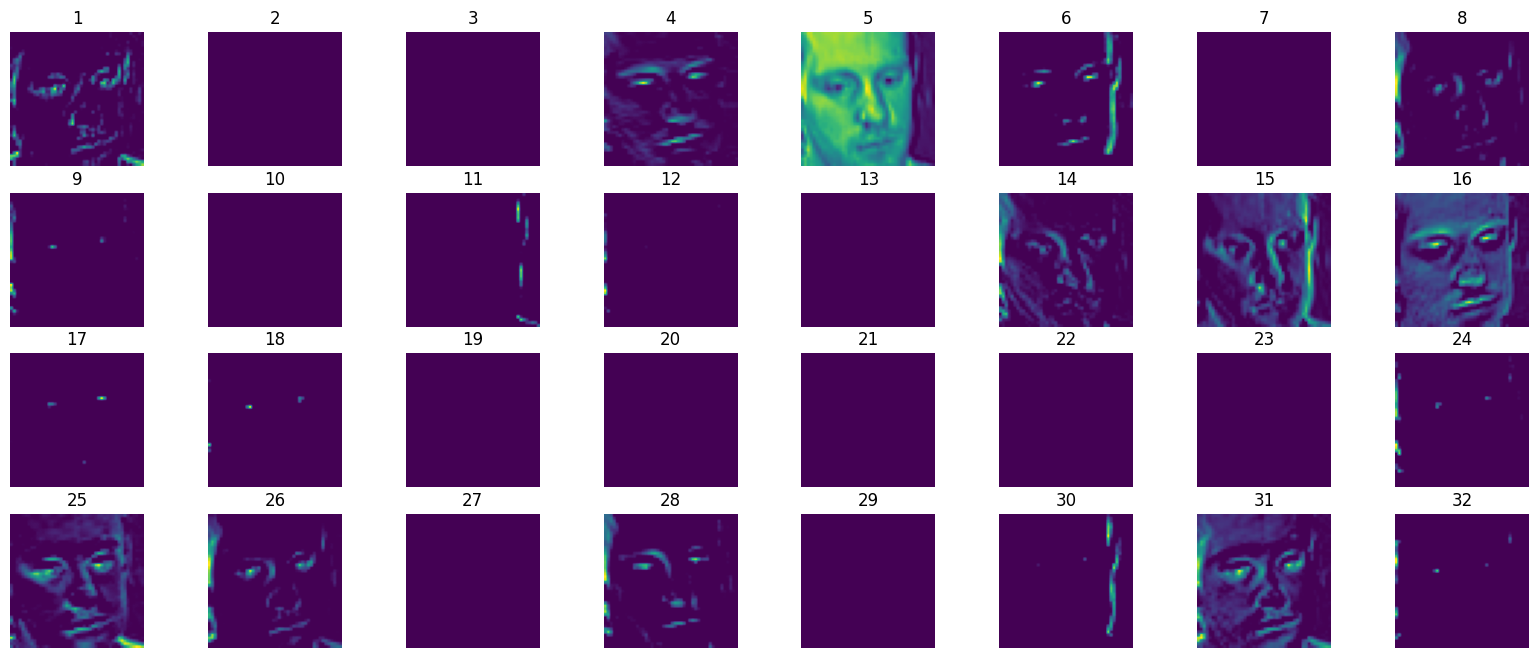

Layer: conv2d_1
Activation Shape: (1, 44, 44, 64)


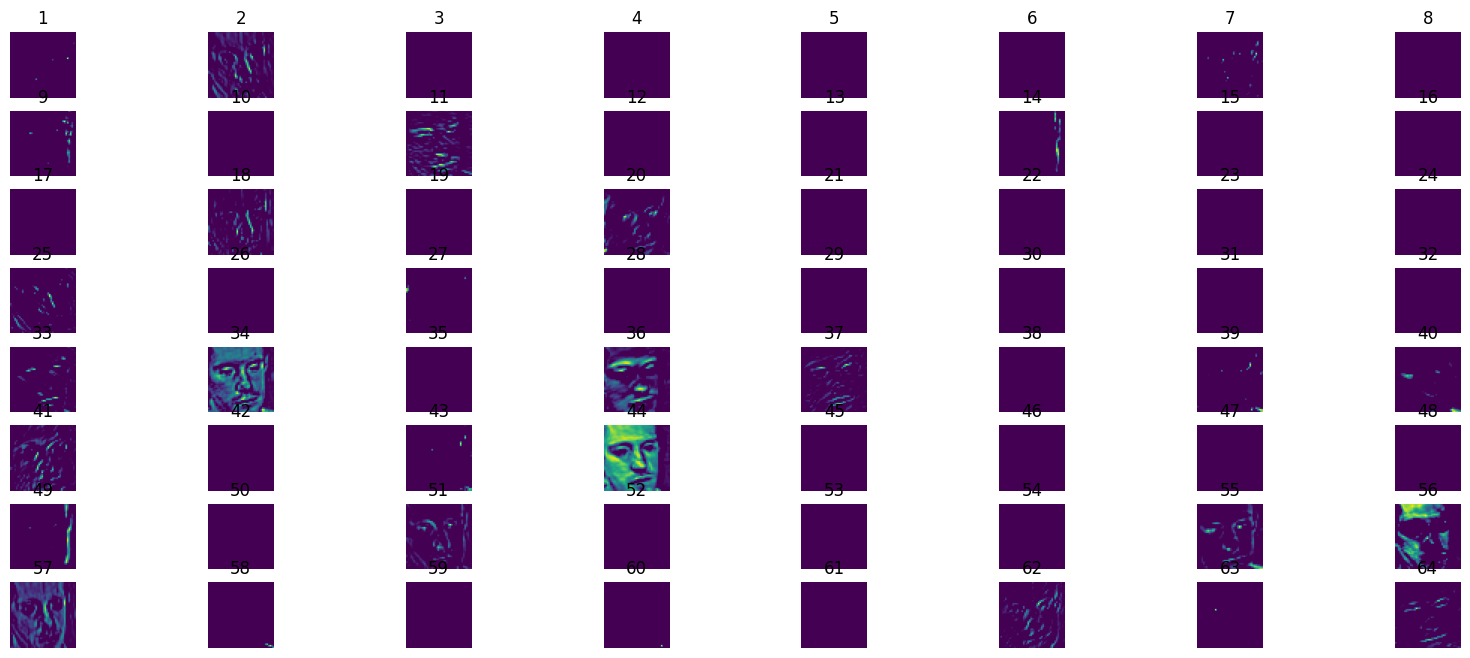

Layer: conv2d_2
Activation Shape: (1, 20, 20, 128)


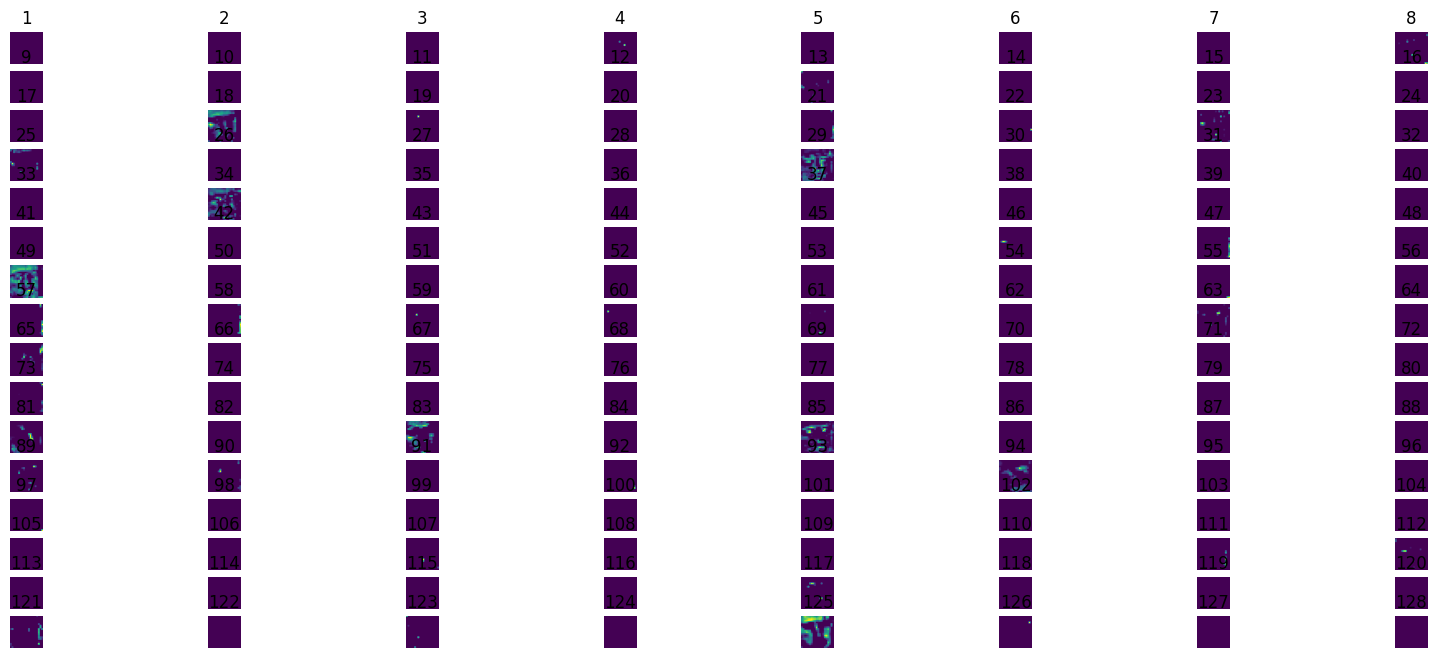

Layer: conv2d_3
Activation Shape: (1, 8, 8, 256)


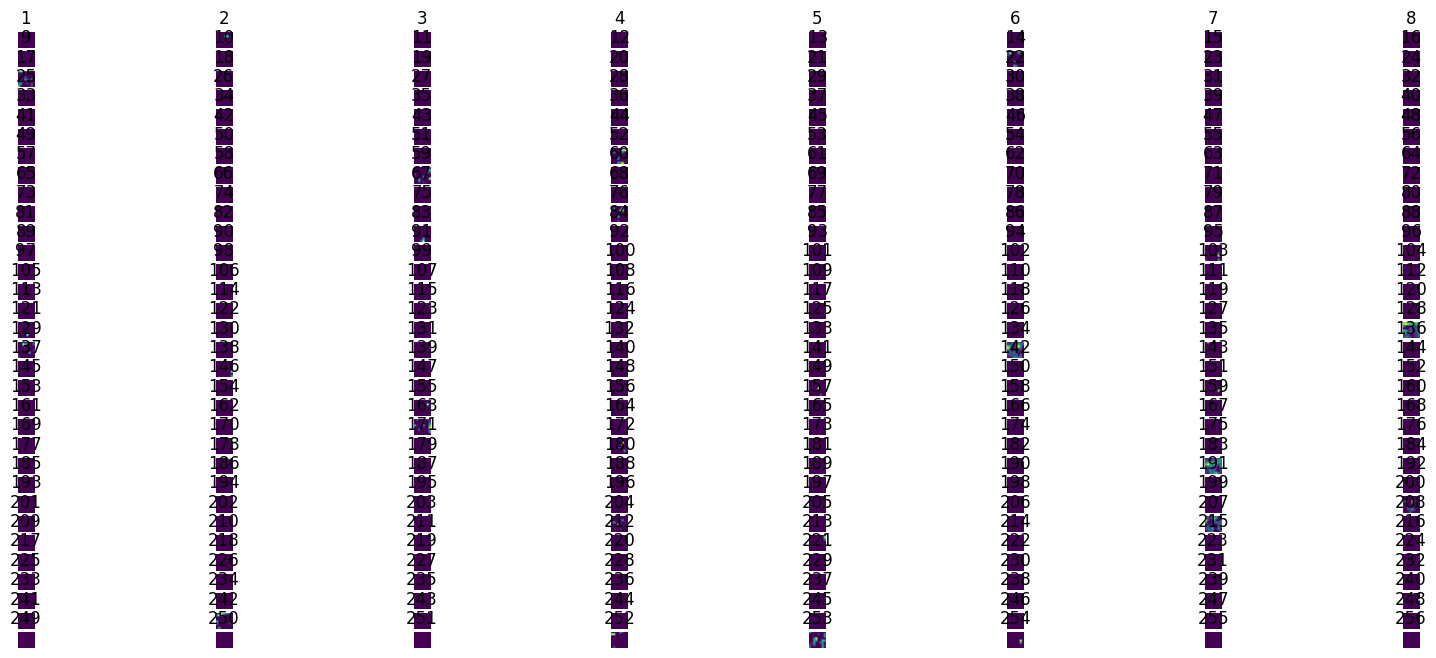

In [ ]:
img_path = '/content/drive/MyDrive/NITC_Projects/Deep_Learning_Projects/CNN_Face_emotion_detection/datasets/face_emotion_50im_each/train/sad'


visualize_activations(model, img_path, class_labels)

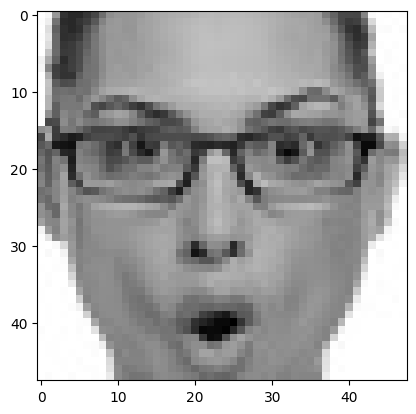

1/1 [==============================] - 0s 25ms/step
Predicted class: surprise
Layer: conv2d
Activation Shape: (1, 46, 46, 32)


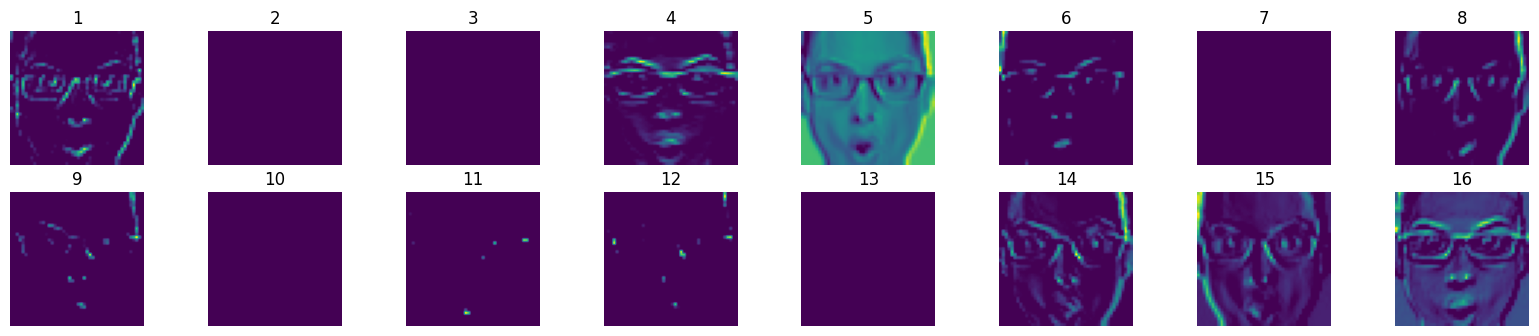

Layer: conv2d_1
Activation Shape: (1, 44, 44, 64)


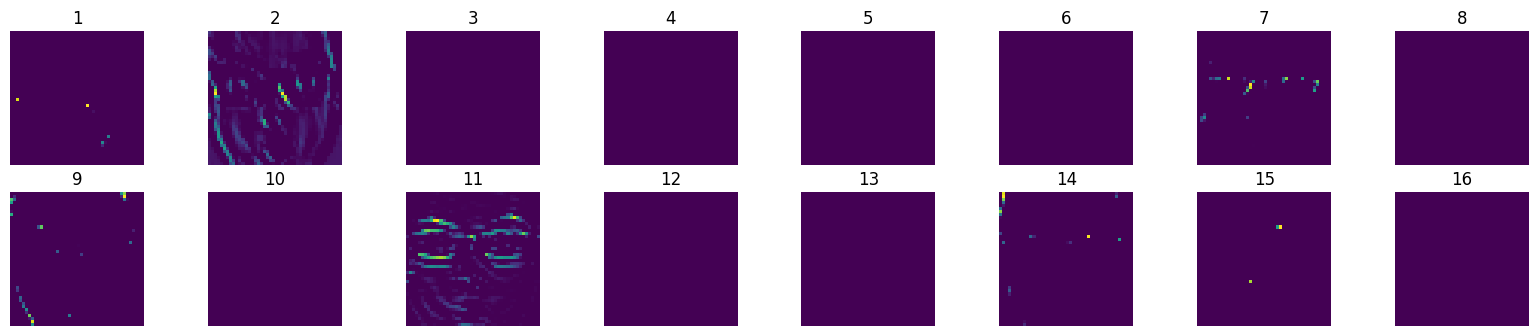

Layer: conv2d_2
Activation Shape: (1, 20, 20, 128)


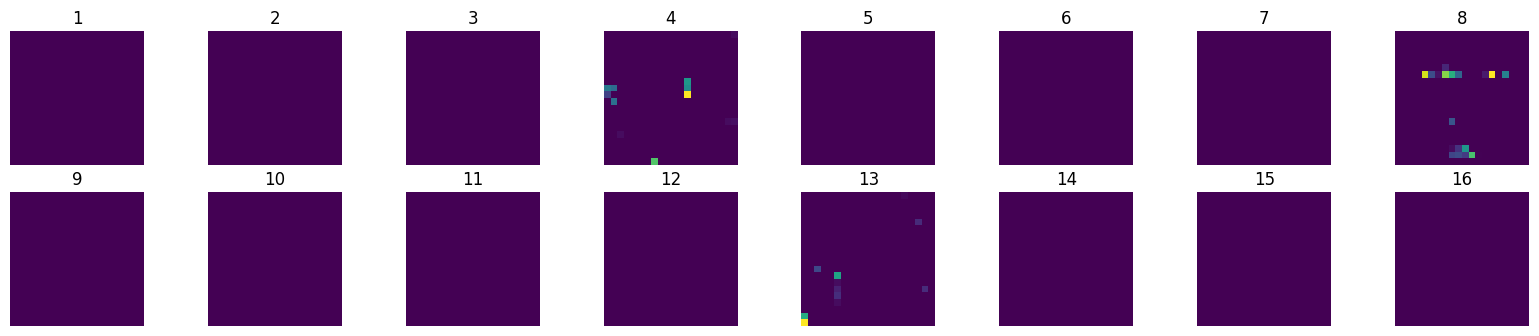

Layer: conv2d_3
Activation Shape: (1, 8, 8, 256)


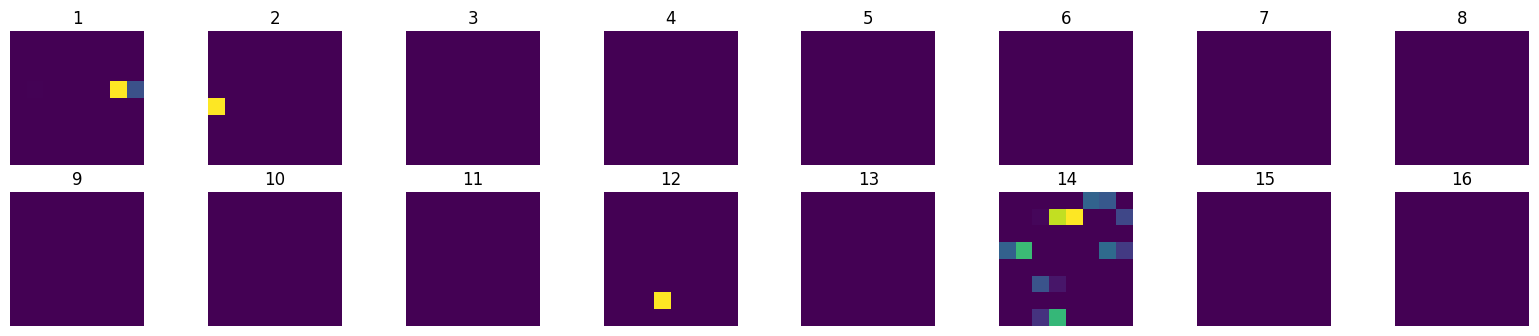

In [ ]:
img_path = '/content/drive/MyDrive/NITC_Projects/Deep_Learning_Projects/CNN_Face_emotion_detection/datasets/face_emotion_50im_each/train/surprise'


visualize_activations(model, img_path, class_labels)

    "Input Convolution (Kernel: 3x3, Strides: 1, Padding: valid)",
    "Feature Extraction 1 (Kernel: 3x3, Strides: 1, Padding: valid, Params: 18496)",
    "Max Pooling 1 (Pool Size: 2x2, Strides: 2, Padding: valid)",
    "Dropout 1 (Rate: 0.1)",
    "Feature Extraction 2 (Kernel: 3x3, Strides: 1, Padding: valid, Params: 73856)",
    "Max Pooling 2 (Pool Size: 2x2, Strides: 2, Padding: valid)",
    "Dropout 2 (Rate: 0.1)",
    "Feature Extraction 3 (Kernel: 3x3, Strides: 1, Padding: valid, Params: 295168)",
    "Max Pooling 3 (Pool Size: 2x2, Strides: 2, Padding: valid)",
    "Dropout 3 (Rate: 0.1)",
    "Flatten",
    "Dense 1 (Units: 512, Params: 2097664)",
    "Dropout 4 (Rate: 0.2)",
    "Output (Units: 7)"
]